In [1]:
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [2]:
def smooth(y,w=7,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [7]:
# No regulation
d_nr = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format('capital'))
s_nr = pd.read_csv('csv/1.1/supply_{}_1_1.csv'.format('capital'))

# Weak regulation
d_wr = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format('capital_with_low_sub'))
s_wr = pd.read_csv('csv/1.1/supply_{}_1_1.csv'.format('capital_with_low_sub'))

# Weak regulation with lockout
d_wrl = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format('capital_with_low_sub_lockout'))
s_wrl = pd.read_csv('csv/1.1/supply_{}_1_1.csv'.format('capital_with_low_sub_lockout'))

# Moderate regulation
d_mr = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format('capital_with_moderate_sub'))
s_mr = pd.read_csv('csv/1.1/supply_{}_1_1.csv'.format('capital_with_moderate_sub'))

# Strong regulation
d_sr = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format('capital_with_high_sub'))
s_sr = pd.read_csv('csv/1.1/supply_{}_1_1.csv'.format('capital_with_high_sub'))

In [4]:
def s_1(y, w=7, o=1, d=5):
    from scipy.signal import savgol_filter
    if len(y) < w:
        raise ValueError("Input data length must be greater than or equal to the window size (w).")
    nans = [float('nan') for _ in range(0, d)]
    smoothed = savgol_filter(y[d:], w, o)
    y = nans + list(smoothed)
    return y

def s_2(y, w=27, o=1, d=5):
    from scipy.signal import savgol_filter
    if len(y) < w:
        raise ValueError("Input data length must be greater than or equal to the window size (w).")
    nans = [float('nan') for _ in range(0, d)]
    smoothed = savgol_filter(y[d:], w, o)
    y = nans + list(smoothed)
    return y

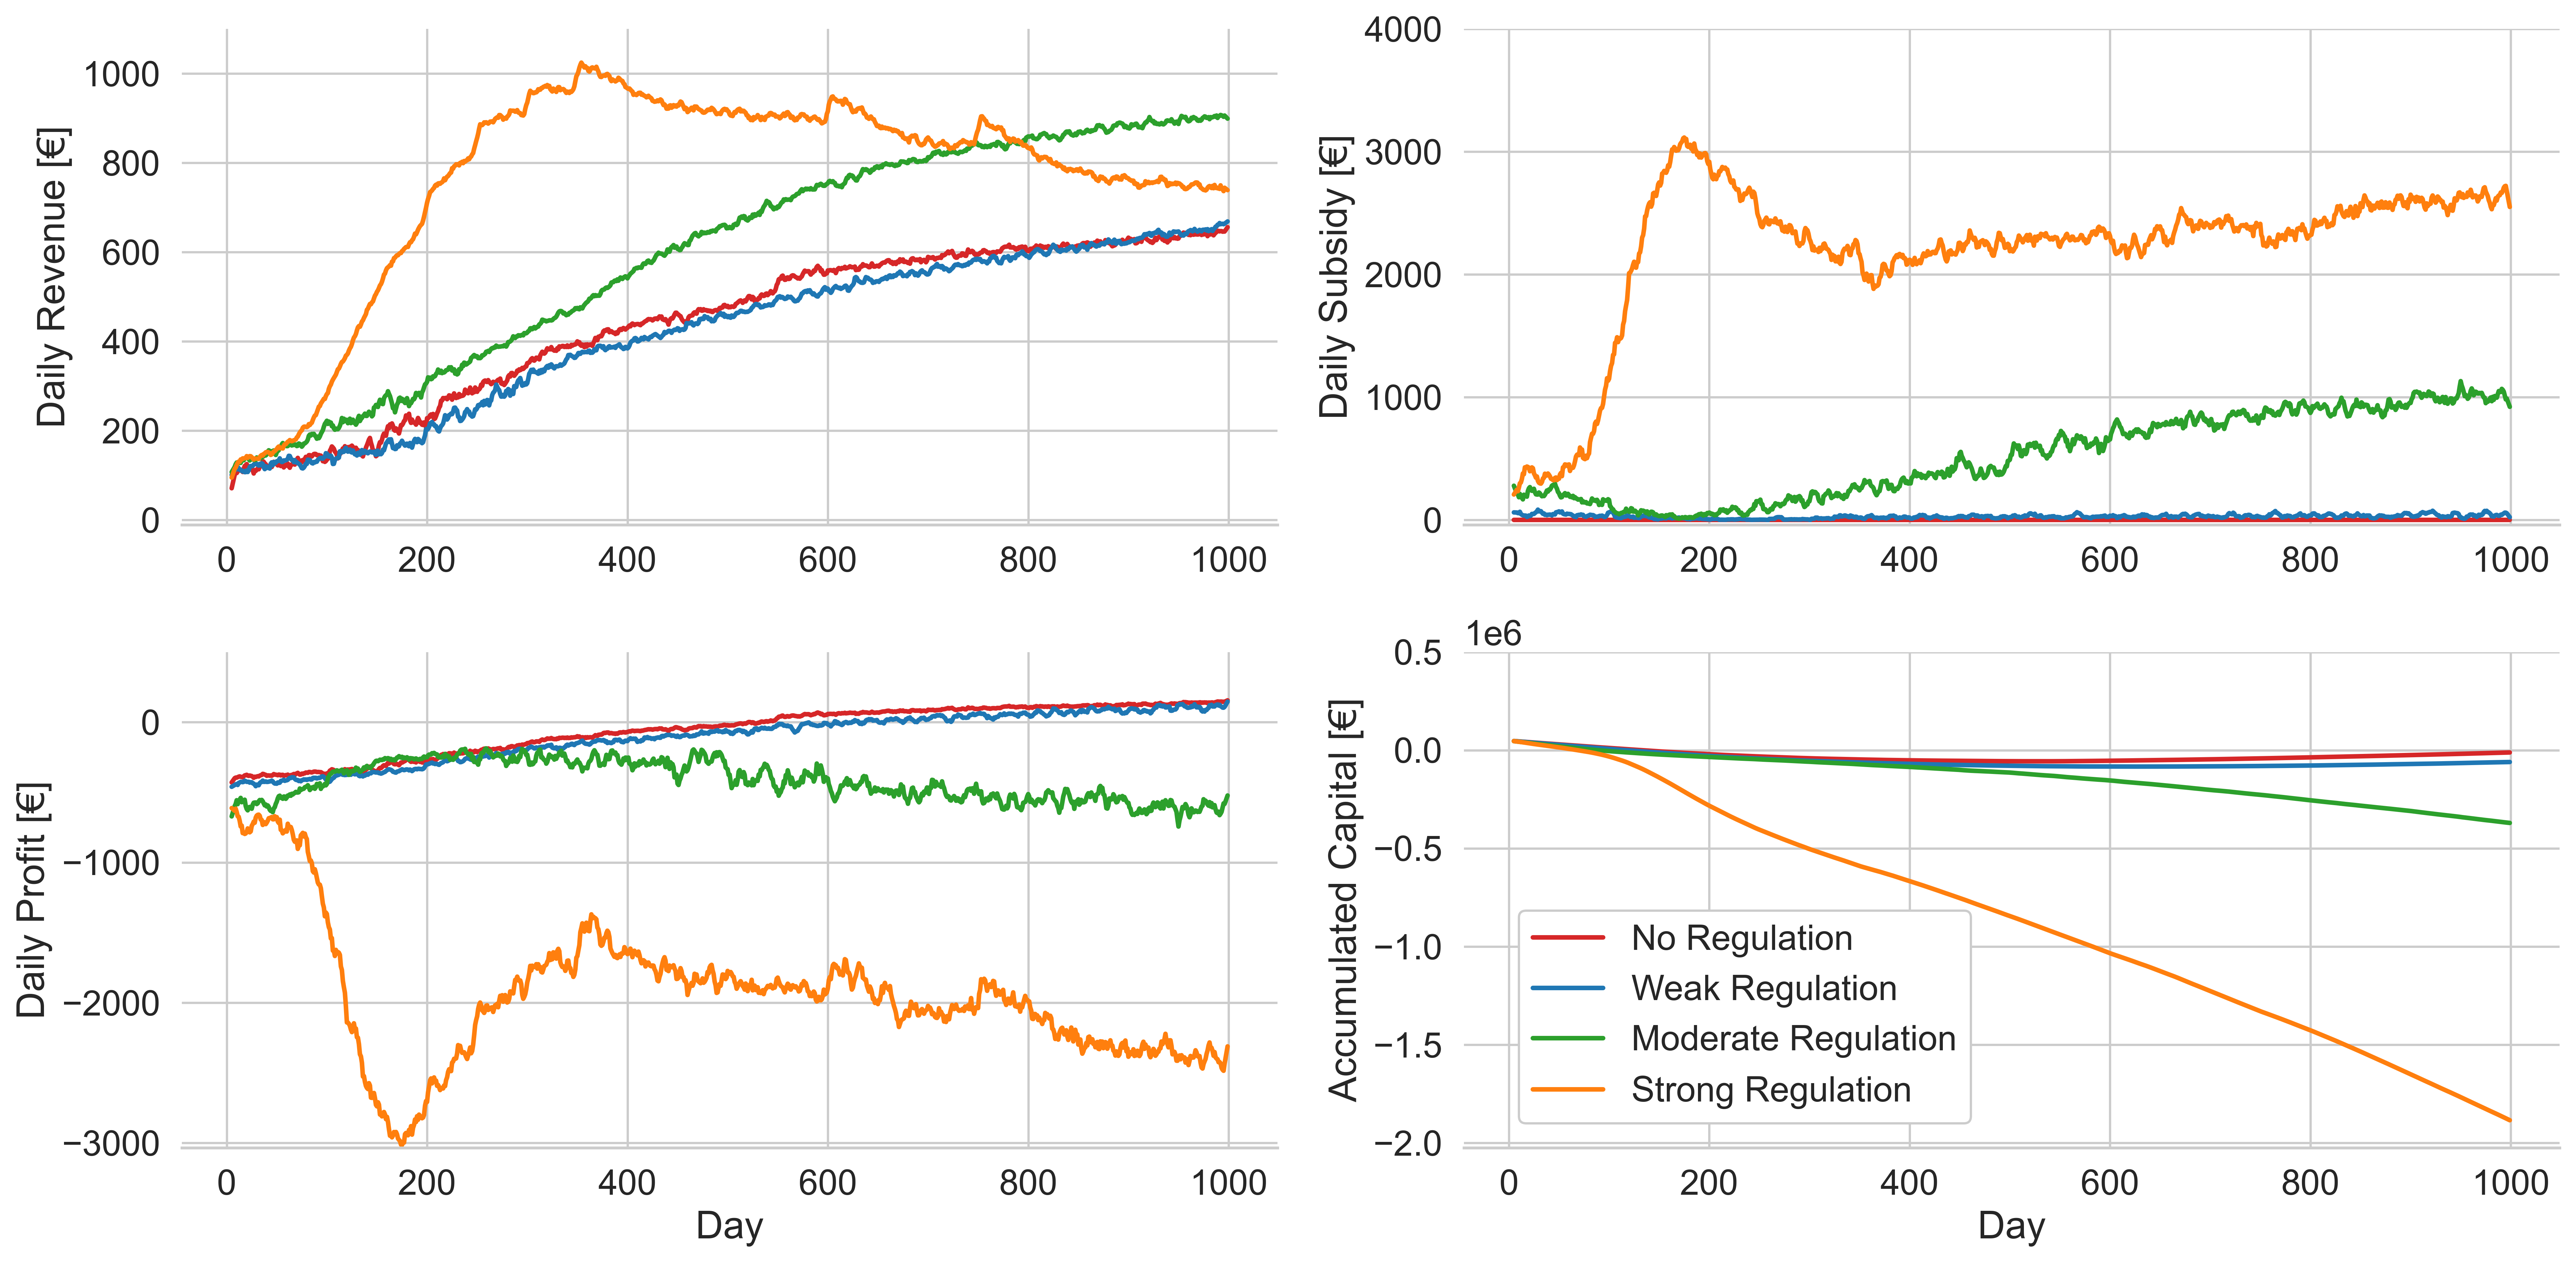

In [5]:
# With no lockout

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.4)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C3'; c2 = 'C0'; c3 = 'C2'; c4 = 'C1'
lw = 2

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_revenue+d_nr.P2_revenue)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_wr.index, y=s_1((d_wr.P1_revenue+d_wr.P2_revenue)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_revenue+d_mr.P2_revenue)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_revenue+d_sr.P2_revenue)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][0])

ax[0][0].set(xlabel='', ylabel='Daily Revenue [€]', ylim = (-11, 1100))
ax[0][0].legend().remove()

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_min_wage_sub+d_nr.P2_min_wage_sub)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_wr.index, y=s_1((d_wr.P1_min_wage_sub+d_wr.P2_min_wage_sub)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_min_wage_sub+d_mr.P2_min_wage_sub)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_min_wage_sub+d_sr.P2_min_wage_sub)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][1])
ax[0][1].legend().remove()

ax[0][1].set(xlabel='', ylabel='Daily Subsidy [€]', ylim = (-40, 4000))

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_profit+d_nr.P2_profit)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][0])
sns.lineplot(x=d_wr.index, y=s_1((d_wr.P1_profit+d_wr.P2_profit)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][0])
sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_profit+d_mr.P2_profit)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][0])
sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_profit+d_sr.P2_profit)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][0])
ax[1][0].legend().remove()

ax[1][0].set(xlabel='Day', ylabel='Daily Profit [€]', ylim = (-3035, 500))

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_remaining_capital+d_nr.P2_remaining_capital)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][1])
sns.lineplot(x=d_wr.index, y=s_1((d_wr.P1_remaining_capital+d_wr.P2_remaining_capital)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][1])
sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_remaining_capital+d_mr.P2_remaining_capital)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][1])
sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_remaining_capital+d_sr.P2_remaining_capital)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][1])
ax[1][1].legend().remove()

ax[1][1].set(xlabel='Day', ylabel='Accumulated Capital [€]', ylim = (-2025000, 500000))

#-------------------------------------------------

ax[1][1].legend(frameon=True,framealpha=1, loc=(0.05,0.05))
plt.tight_layout()
# plt.savefig('Figs/1.1/P3_fig1.png')

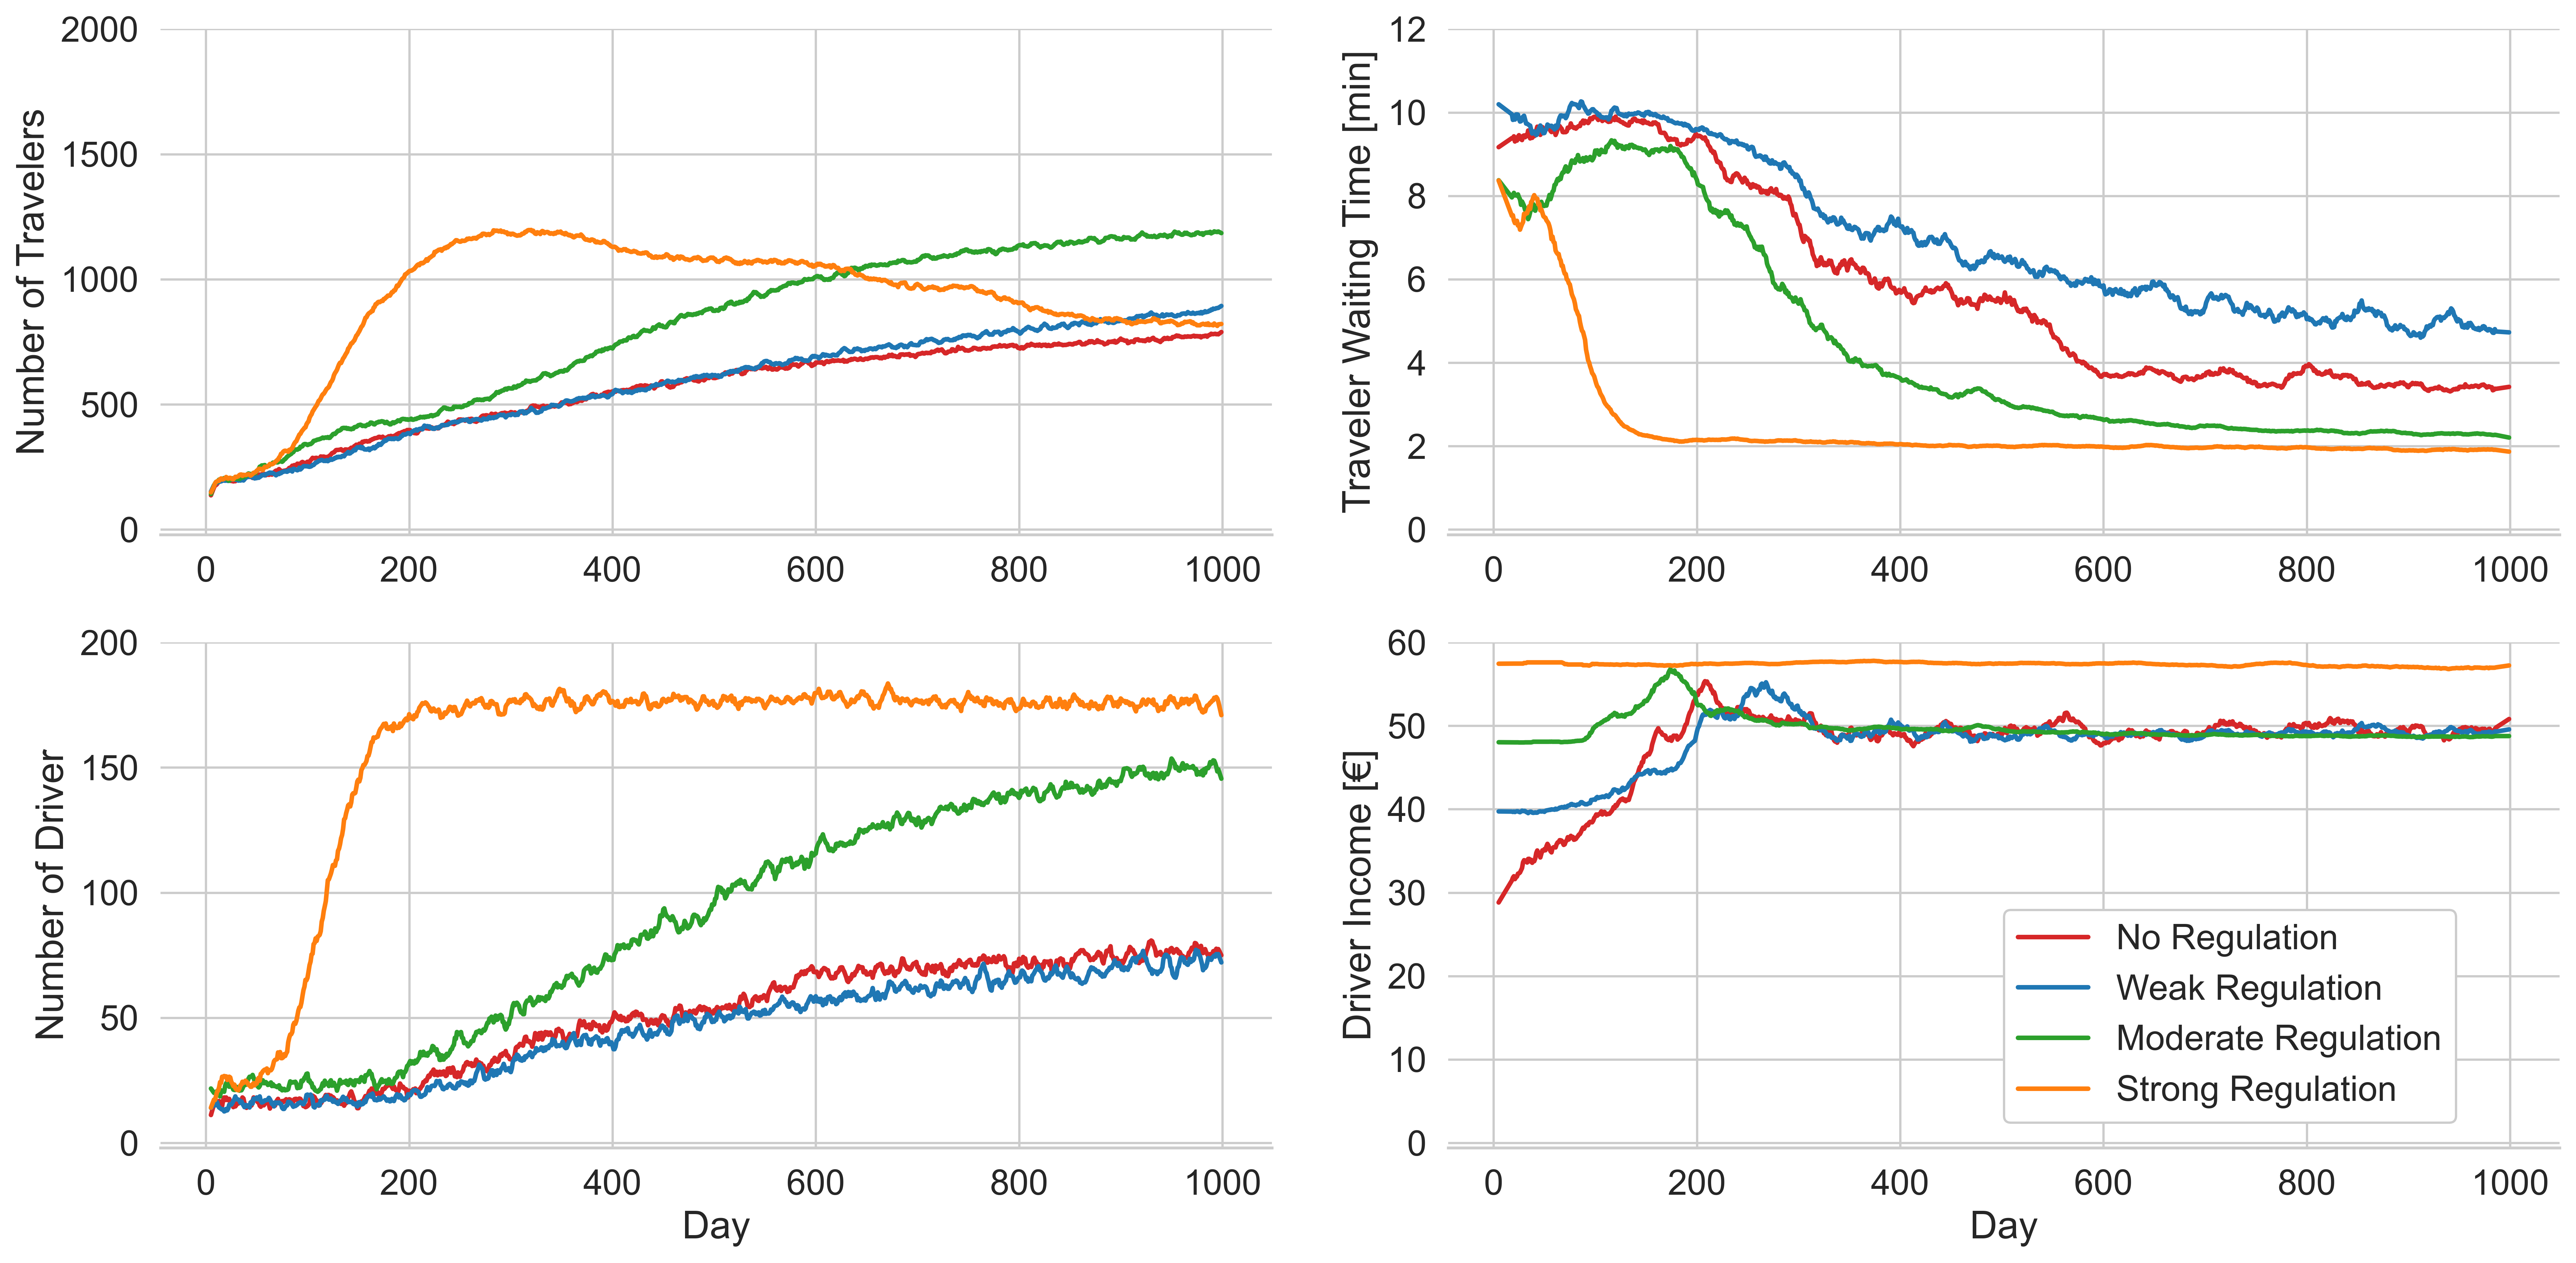

In [6]:
# With no lockout

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.4)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C3'; c2 = 'C0'; c3 = 'C2'; c4 = 'C1'
lw = 2

sns.lineplot(x=d_nr.index, y=s_1(d_nr.P1_OUT+d_nr.P2_OUT), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_wr.index, y=s_1(d_wr.P1_OUT+d_wr.P2_OUT), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_mr.index, y=s_1(d_mr.P1_OUT+d_mr.P2_OUT), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_sr.index, y=s_1(d_sr.P1_OUT+d_sr.P2_OUT), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][0])
ax[0][0].legend().remove()

ax[0][0].set(xlabel='', ylabel='Number of Travelers', ylim = (-20, 2000))

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_2(((d_nr.P1_OUT*d_nr.P1_ACTUAL_WT)+(d_nr.P2_OUT*d_nr.P2_ACTUAL_WT))/(d_nr.P1_OUT+d_nr.P2_OUT)), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_wr.index, y=s_2(((d_wr.P1_OUT*d_wr.P1_ACTUAL_WT)+(d_wr.P2_OUT*d_wr.P2_ACTUAL_WT))/(d_wr.P1_OUT+d_wr.P2_OUT)), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_mr.index, y=s_2(((d_mr.P1_OUT*d_mr.P1_ACTUAL_WT)+(d_mr.P2_OUT*d_mr.P2_ACTUAL_WT))/(d_mr.P1_OUT+d_mr.P2_OUT)), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_sr.index, y=s_2(((d_sr.P1_OUT*d_sr.P1_ACTUAL_WT)+(d_sr.P2_OUT*d_sr.P2_ACTUAL_WT))/(d_sr.P1_OUT+d_sr.P2_OUT)), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][1])
ax[0][1].legend().remove()

ax[0][1].set(xlabel='', ylabel='Traveler Waiting Time [min]', ylim = (-0.12, 12))

#------------------------------------------------

sns.lineplot(x=s_nr.index, y=s_1(s_nr.P1_OUT+s_nr.P2_OUT), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][0])
sns.lineplot(x=s_wr.index, y=s_1(s_wr.P1_OUT+s_wr.P2_OUT), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][0])
sns.lineplot(x=s_mr.index, y=s_1(s_mr.P1_OUT+s_mr.P2_OUT), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][0])
sns.lineplot(x=s_sr.index, y=s_1(s_sr.P1_OUT+s_sr.P2_OUT), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][0])
ax[1][0].legend().remove()

ax[1][0].set(xlabel='Day', ylabel='Number of Driver', ylim = (-2, 200))

#------------------------------------------------

sns.lineplot(x=s_nr.index, y=s_2(((s_nr.P1_OUT*s_nr.P1_ACTUAL_INC)+(s_nr.P2_OUT*s_nr.P2_ACTUAL_INC))/(s_nr.P1_OUT+s_nr.P2_OUT)), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][1])
sns.lineplot(x=s_wr.index, y=s_2(((s_wr.P1_OUT*s_wr.P1_ACTUAL_INC)+(s_wr.P2_OUT*s_wr.P2_ACTUAL_INC))/(s_wr.P1_OUT+s_wr.P2_OUT)), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][1])
sns.lineplot(x=s_mr.index, y=s_2(((s_mr.P1_OUT*s_mr.P1_ACTUAL_INC)+(s_mr.P2_OUT*s_mr.P2_ACTUAL_INC))/(s_mr.P1_OUT+s_mr.P2_OUT)), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][1])
sns.lineplot(x=s_sr.index, y=s_2(((s_sr.P1_OUT*s_sr.P1_ACTUAL_INC)+(s_sr.P2_OUT*s_sr.P2_ACTUAL_INC))/(s_sr.P1_OUT+s_sr.P2_OUT)), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][1])
ax[1][1].legend().remove()

ax[1][1].set(xlabel='Day', ylabel='Driver Income [€]', ylim = (-0.6, 60))

#-------------------------------------------------

ax[1][1].legend(frameon=True,framealpha=1, loc=(0.5,0.05))
plt.tight_layout()
# plt.savefig('Figs/1.1/P3_fig2.png')

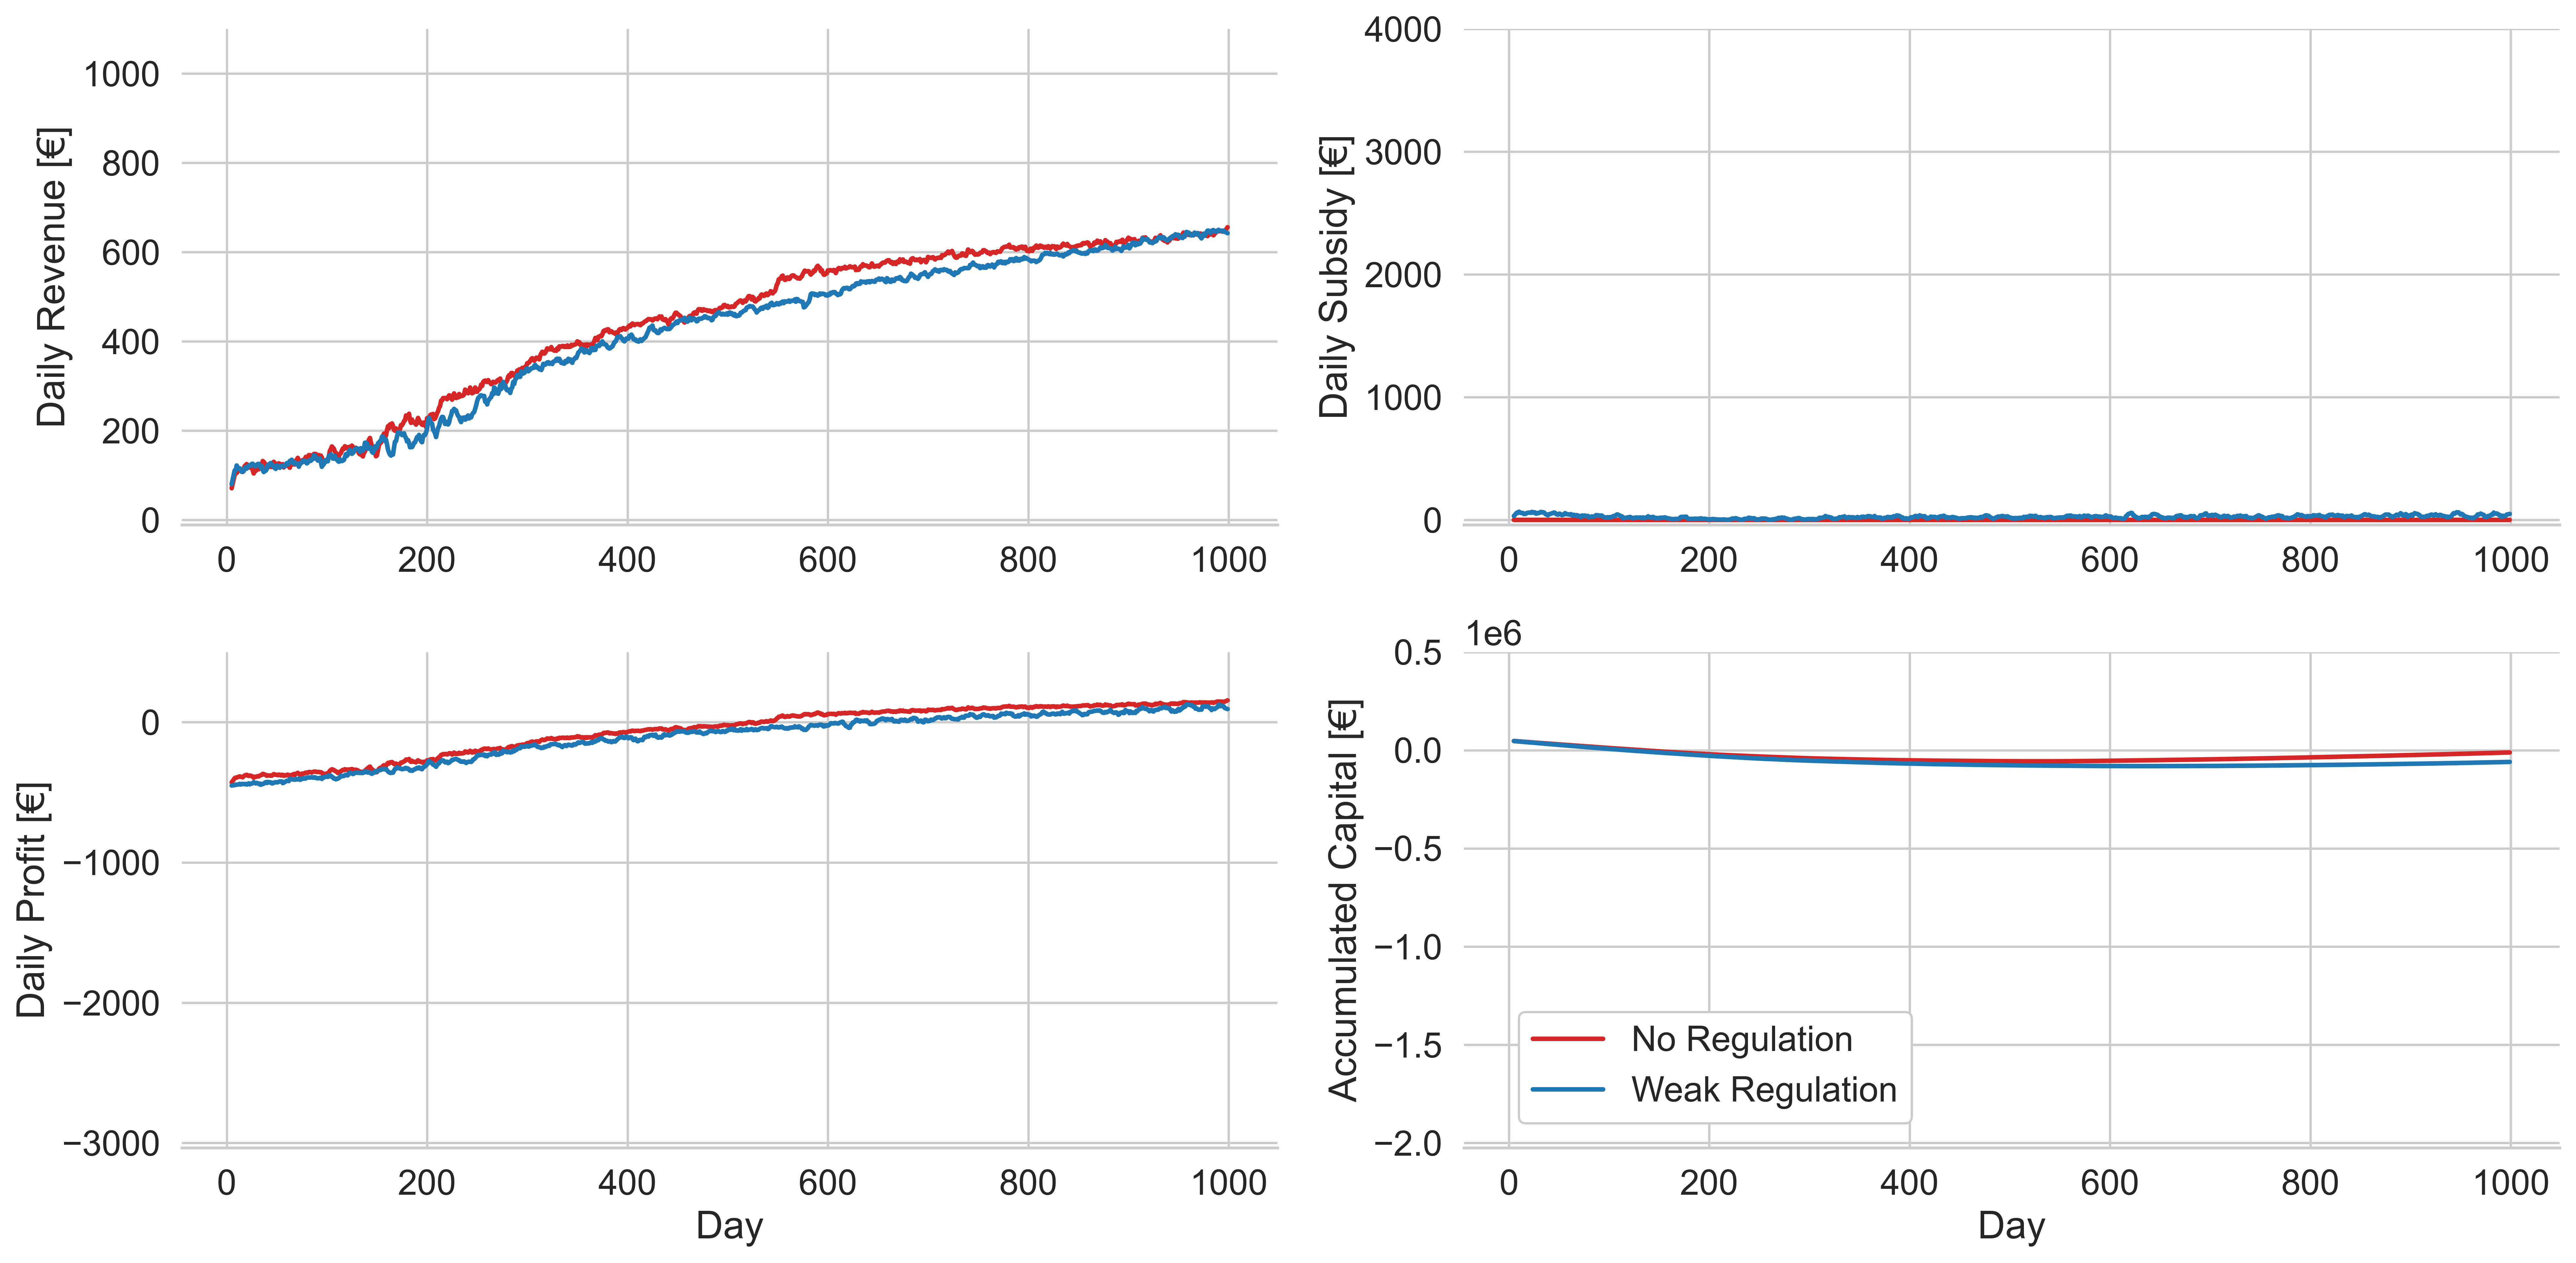

In [9]:
# With lockout

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.4)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C3'; c2 = 'C0'; c3 = 'C2'; c4 = 'C1'
lw = 2

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_revenue+d_nr.P2_revenue)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_wrl.index, y=s_1((d_wrl.P1_revenue+d_wrl.P2_revenue)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][0])
# sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_revenue+d_mr.P2_revenue)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][0])
# sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_revenue+d_sr.P2_revenue)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][0])

ax[0][0].set(xlabel='', ylabel='Daily Revenue [€]', ylim = (-11, 1100))
ax[0][0].legend().remove()

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_min_wage_sub+d_nr.P2_min_wage_sub)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_wrl.index, y=s_1((d_wrl.P1_min_wage_sub+d_wrl.P2_min_wage_sub)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][1])
# sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_min_wage_sub+d_mr.P2_min_wage_sub)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][1])
# sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_min_wage_sub+d_sr.P2_min_wage_sub)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][1])
ax[0][1].legend().remove()

ax[0][1].set(xlabel='', ylabel='Daily Subsidy [€]', ylim = (-40, 4000))

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_profit+d_nr.P2_profit)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][0])
sns.lineplot(x=d_wrl.index, y=s_1((d_wrl.P1_profit+d_wrl.P2_profit)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][0])
# sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_profit+d_mr.P2_profit)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][0])
# sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_profit+d_sr.P2_profit)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][0])
ax[1][0].legend().remove()

ax[1][0].set(xlabel='Day', ylabel='Daily Profit [€]', ylim = (-3035, 500))

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_1((d_nr.P1_remaining_capital+d_nr.P2_remaining_capital)/2), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][1])
sns.lineplot(x=d_wrl.index, y=s_1((d_wrl.P1_remaining_capital+d_wrl.P2_remaining_capital)/2), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][1])
# sns.lineplot(x=d_mr.index, y=s_1((d_mr.P1_remaining_capital+d_mr.P2_remaining_capital)/2), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][1])
# sns.lineplot(x=d_sr.index, y=s_1((d_sr.P1_remaining_capital+d_sr.P2_remaining_capital)/2), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][1])
ax[1][1].legend().remove()

ax[1][1].set(xlabel='Day', ylabel='Accumulated Capital [€]', ylim = (-2025000, 500000))

#-------------------------------------------------

ax[1][1].legend(frameon=True,framealpha=1, loc=(0.05,0.05))
plt.tight_layout()
# plt.savefig('Figs/1.1/P3_fig1.png')

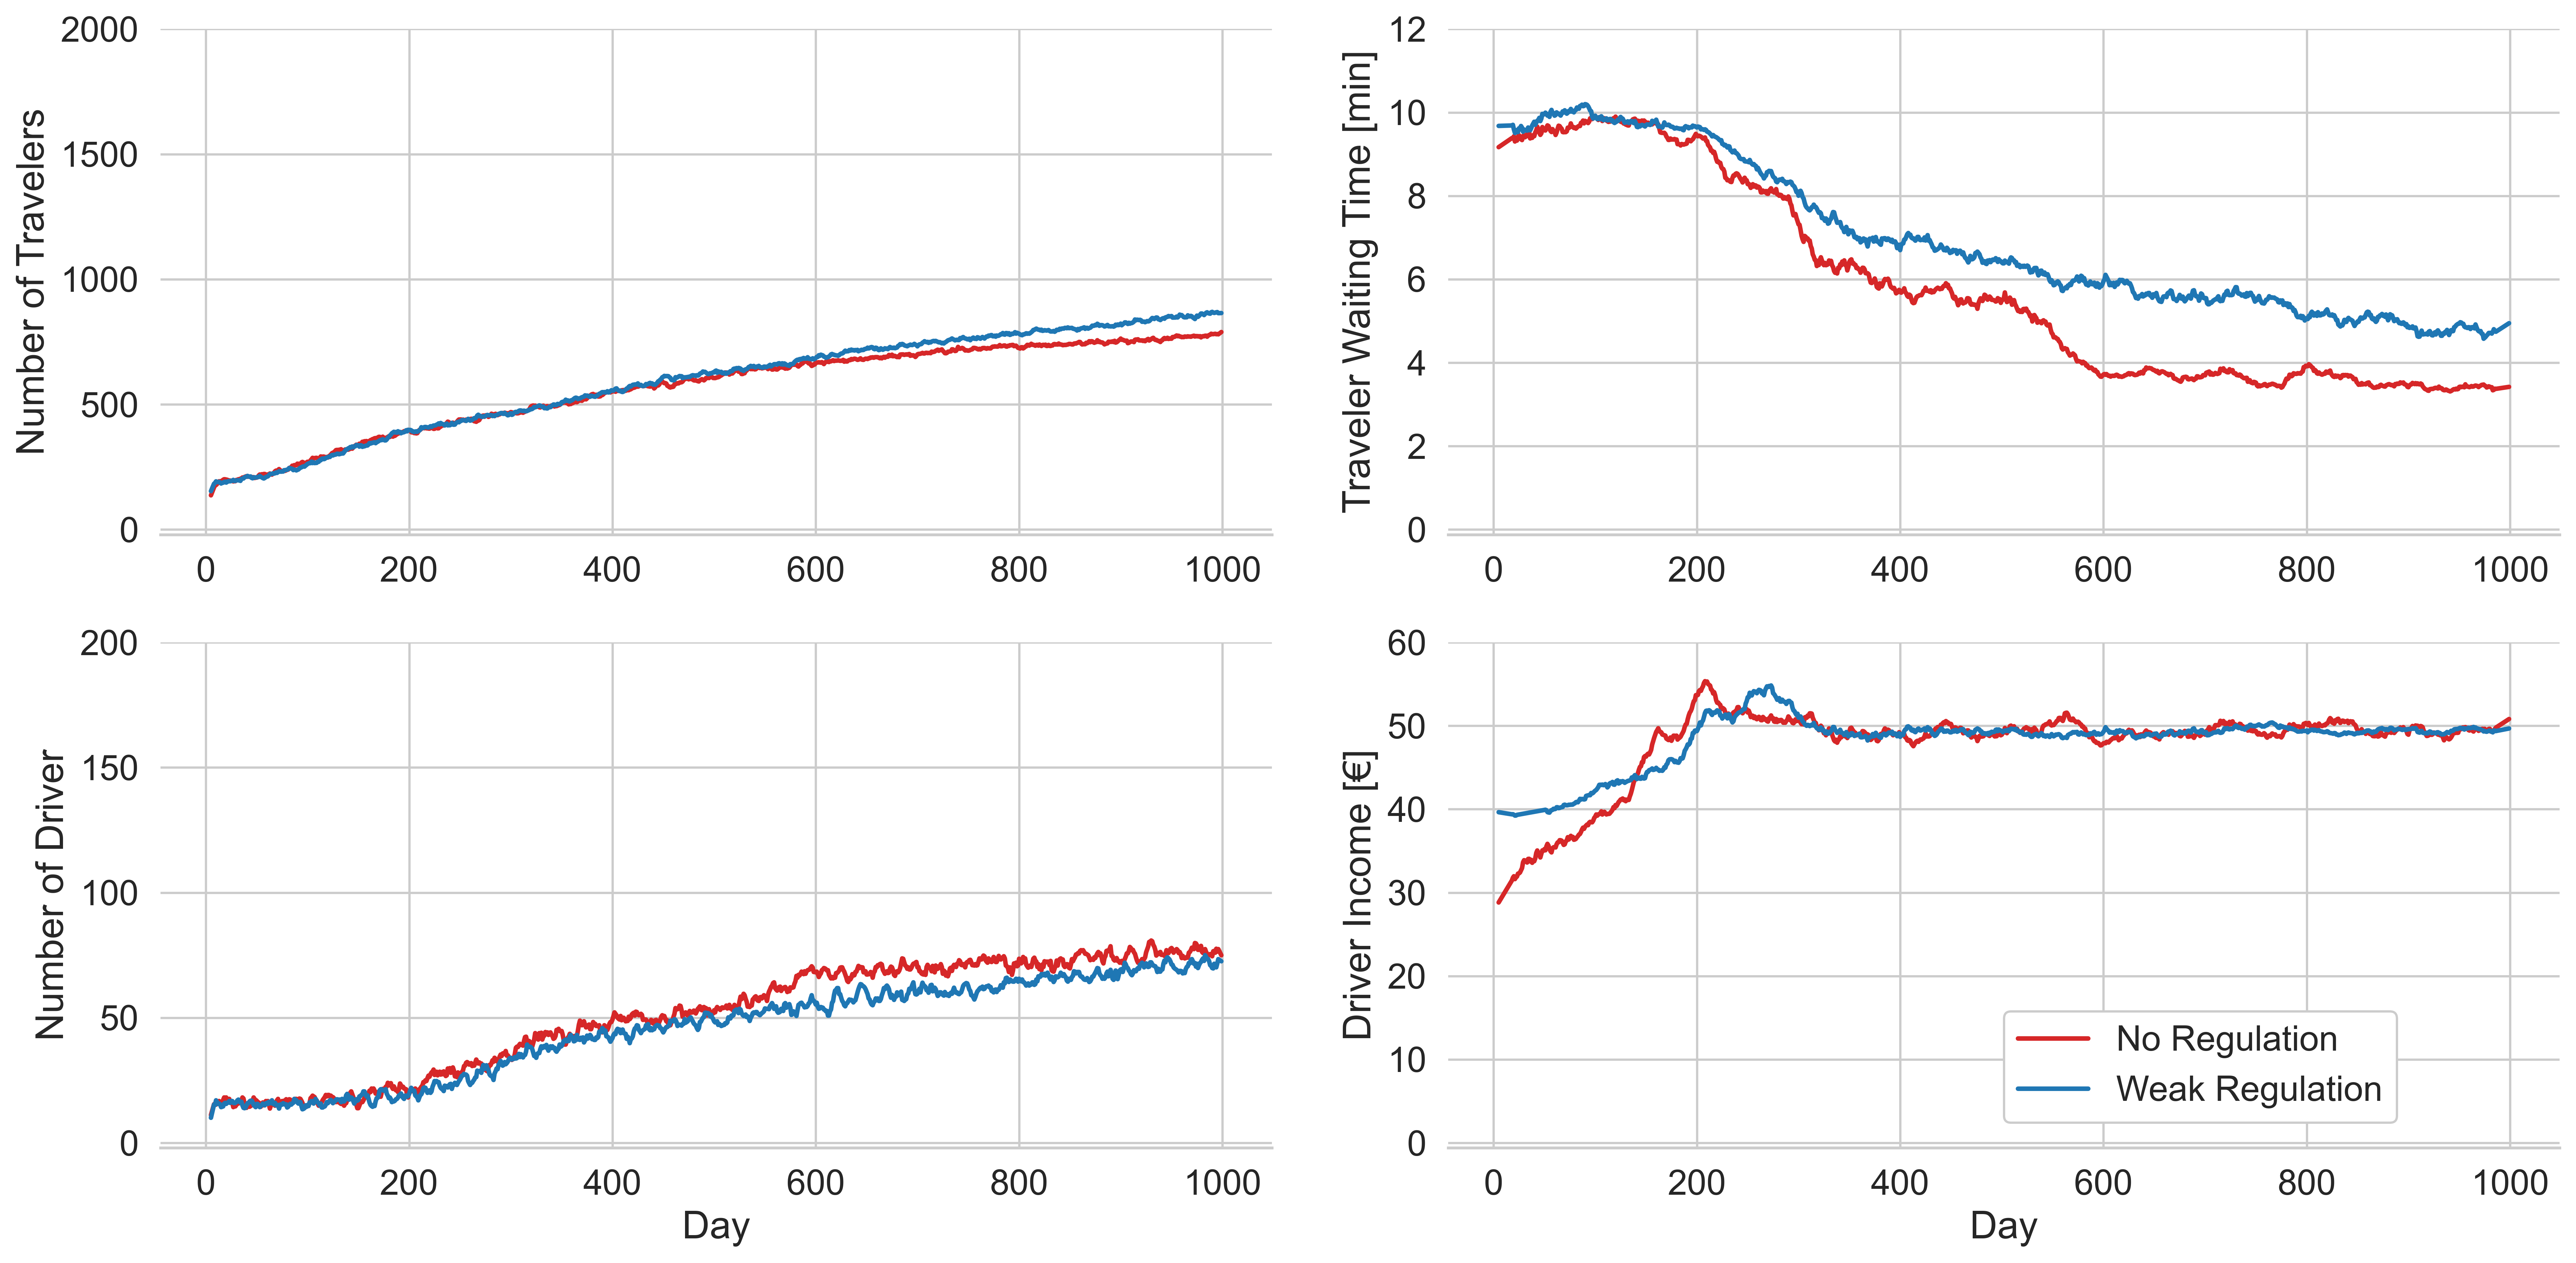

In [10]:
# With lockout

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.4)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C3'; c2 = 'C0'; c3 = 'C2'; c4 = 'C1'
lw = 2

sns.lineplot(x=d_nr.index, y=s_1(d_nr.P1_OUT+d_nr.P2_OUT), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][0])
sns.lineplot(x=d_wrl.index, y=s_1(d_wrl.P1_OUT+d_wrl.P2_OUT), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][0])
# sns.lineplot(x=d_mr.index, y=s_1(d_mr.P1_OUT+d_mr.P2_OUT), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][0])
# sns.lineplot(x=d_sr.index, y=s_1(d_sr.P1_OUT+d_sr.P2_OUT), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][0])
ax[0][0].legend().remove()

ax[0][0].set(xlabel='', ylabel='Number of Travelers', ylim = (-20, 2000))

#------------------------------------------------

sns.lineplot(x=d_nr.index, y=s_2(((d_nr.P1_OUT*d_nr.P1_ACTUAL_WT)+(d_nr.P2_OUT*d_nr.P2_ACTUAL_WT))/(d_nr.P1_OUT+d_nr.P2_OUT)), label = 'No Regulation', color=c1, lw=lw, ax=ax[0][1])
sns.lineplot(x=d_wrl.index, y=s_2(((d_wrl.P1_OUT*d_wrl.P1_ACTUAL_WT)+(d_wrl.P2_OUT*d_wrl.P2_ACTUAL_WT))/(d_wrl.P1_OUT+d_wrl.P2_OUT)), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[0][1])
# sns.lineplot(x=d_mr.index, y=s_2(((d_mr.P1_OUT*d_mr.P1_ACTUAL_WT)+(d_mr.P2_OUT*d_mr.P2_ACTUAL_WT))/(d_mr.P1_OUT+d_mr.P2_OUT)), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[0][1])
# sns.lineplot(x=d_sr.index, y=s_2(((d_sr.P1_OUT*d_sr.P1_ACTUAL_WT)+(d_sr.P2_OUT*d_sr.P2_ACTUAL_WT))/(d_sr.P1_OUT+d_sr.P2_OUT)), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[0][1])
ax[0][1].legend().remove()

ax[0][1].set(xlabel='', ylabel='Traveler Waiting Time [min]', ylim = (-0.12, 12))

#------------------------------------------------

sns.lineplot(x=s_nr.index, y=s_1(s_nr.P1_OUT+s_nr.P2_OUT), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][0])
sns.lineplot(x=s_wrl.index, y=s_1(s_wrl.P1_OUT+s_wrl.P2_OUT), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][0])
# sns.lineplot(x=s_mr.index, y=s_1(s_mr.P1_OUT+s_mr.P2_OUT), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][0])
# sns.lineplot(x=s_sr.index, y=s_1(s_sr.P1_OUT+s_sr.P2_OUT), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][0])
ax[1][0].legend().remove()

ax[1][0].set(xlabel='Day', ylabel='Number of Driver', ylim = (-2, 200))

#------------------------------------------------

sns.lineplot(x=s_nr.index, y=s_2(((s_nr.P1_OUT*s_nr.P1_ACTUAL_INC)+(s_nr.P2_OUT*s_nr.P2_ACTUAL_INC))/(s_nr.P1_OUT+s_nr.P2_OUT)), label = 'No Regulation', color=c1, lw=lw, ax=ax[1][1])
sns.lineplot(x=s_wrl.index, y=s_2(((s_wrl.P1_OUT*s_wrl.P1_ACTUAL_INC)+(s_wrl.P2_OUT*s_wrl.P2_ACTUAL_INC))/(s_wrl.P1_OUT+s_wrl.P2_OUT)), label = 'Weak Regulation', color=c2, lw=lw, ax=ax[1][1])
# sns.lineplot(x=s_mr.index, y=s_2(((s_mr.P1_OUT*s_mr.P1_ACTUAL_INC)+(s_mr.P2_OUT*s_mr.P2_ACTUAL_INC))/(s_mr.P1_OUT+s_mr.P2_OUT)), label = 'Moderate Regulation', color=c3, lw=lw, ax=ax[1][1])
# sns.lineplot(x=s_sr.index, y=s_2(((s_sr.P1_OUT*s_sr.P1_ACTUAL_INC)+(s_sr.P2_OUT*s_sr.P2_ACTUAL_INC))/(s_sr.P1_OUT+s_sr.P2_OUT)), label = 'Strong Regulation', color=c4, lw=lw, ax=ax[1][1])
ax[1][1].legend().remove()

ax[1][1].set(xlabel='Day', ylabel='Driver Income [€]', ylim = (-0.6, 60))

#-------------------------------------------------

ax[1][1].legend(frameon=True,framealpha=1, loc=(0.5,0.05))
plt.tight_layout()
# plt.savefig('Figs/1.1/P3_fig2.png')

<AxesSubplot:ylabel='P1_fare'>

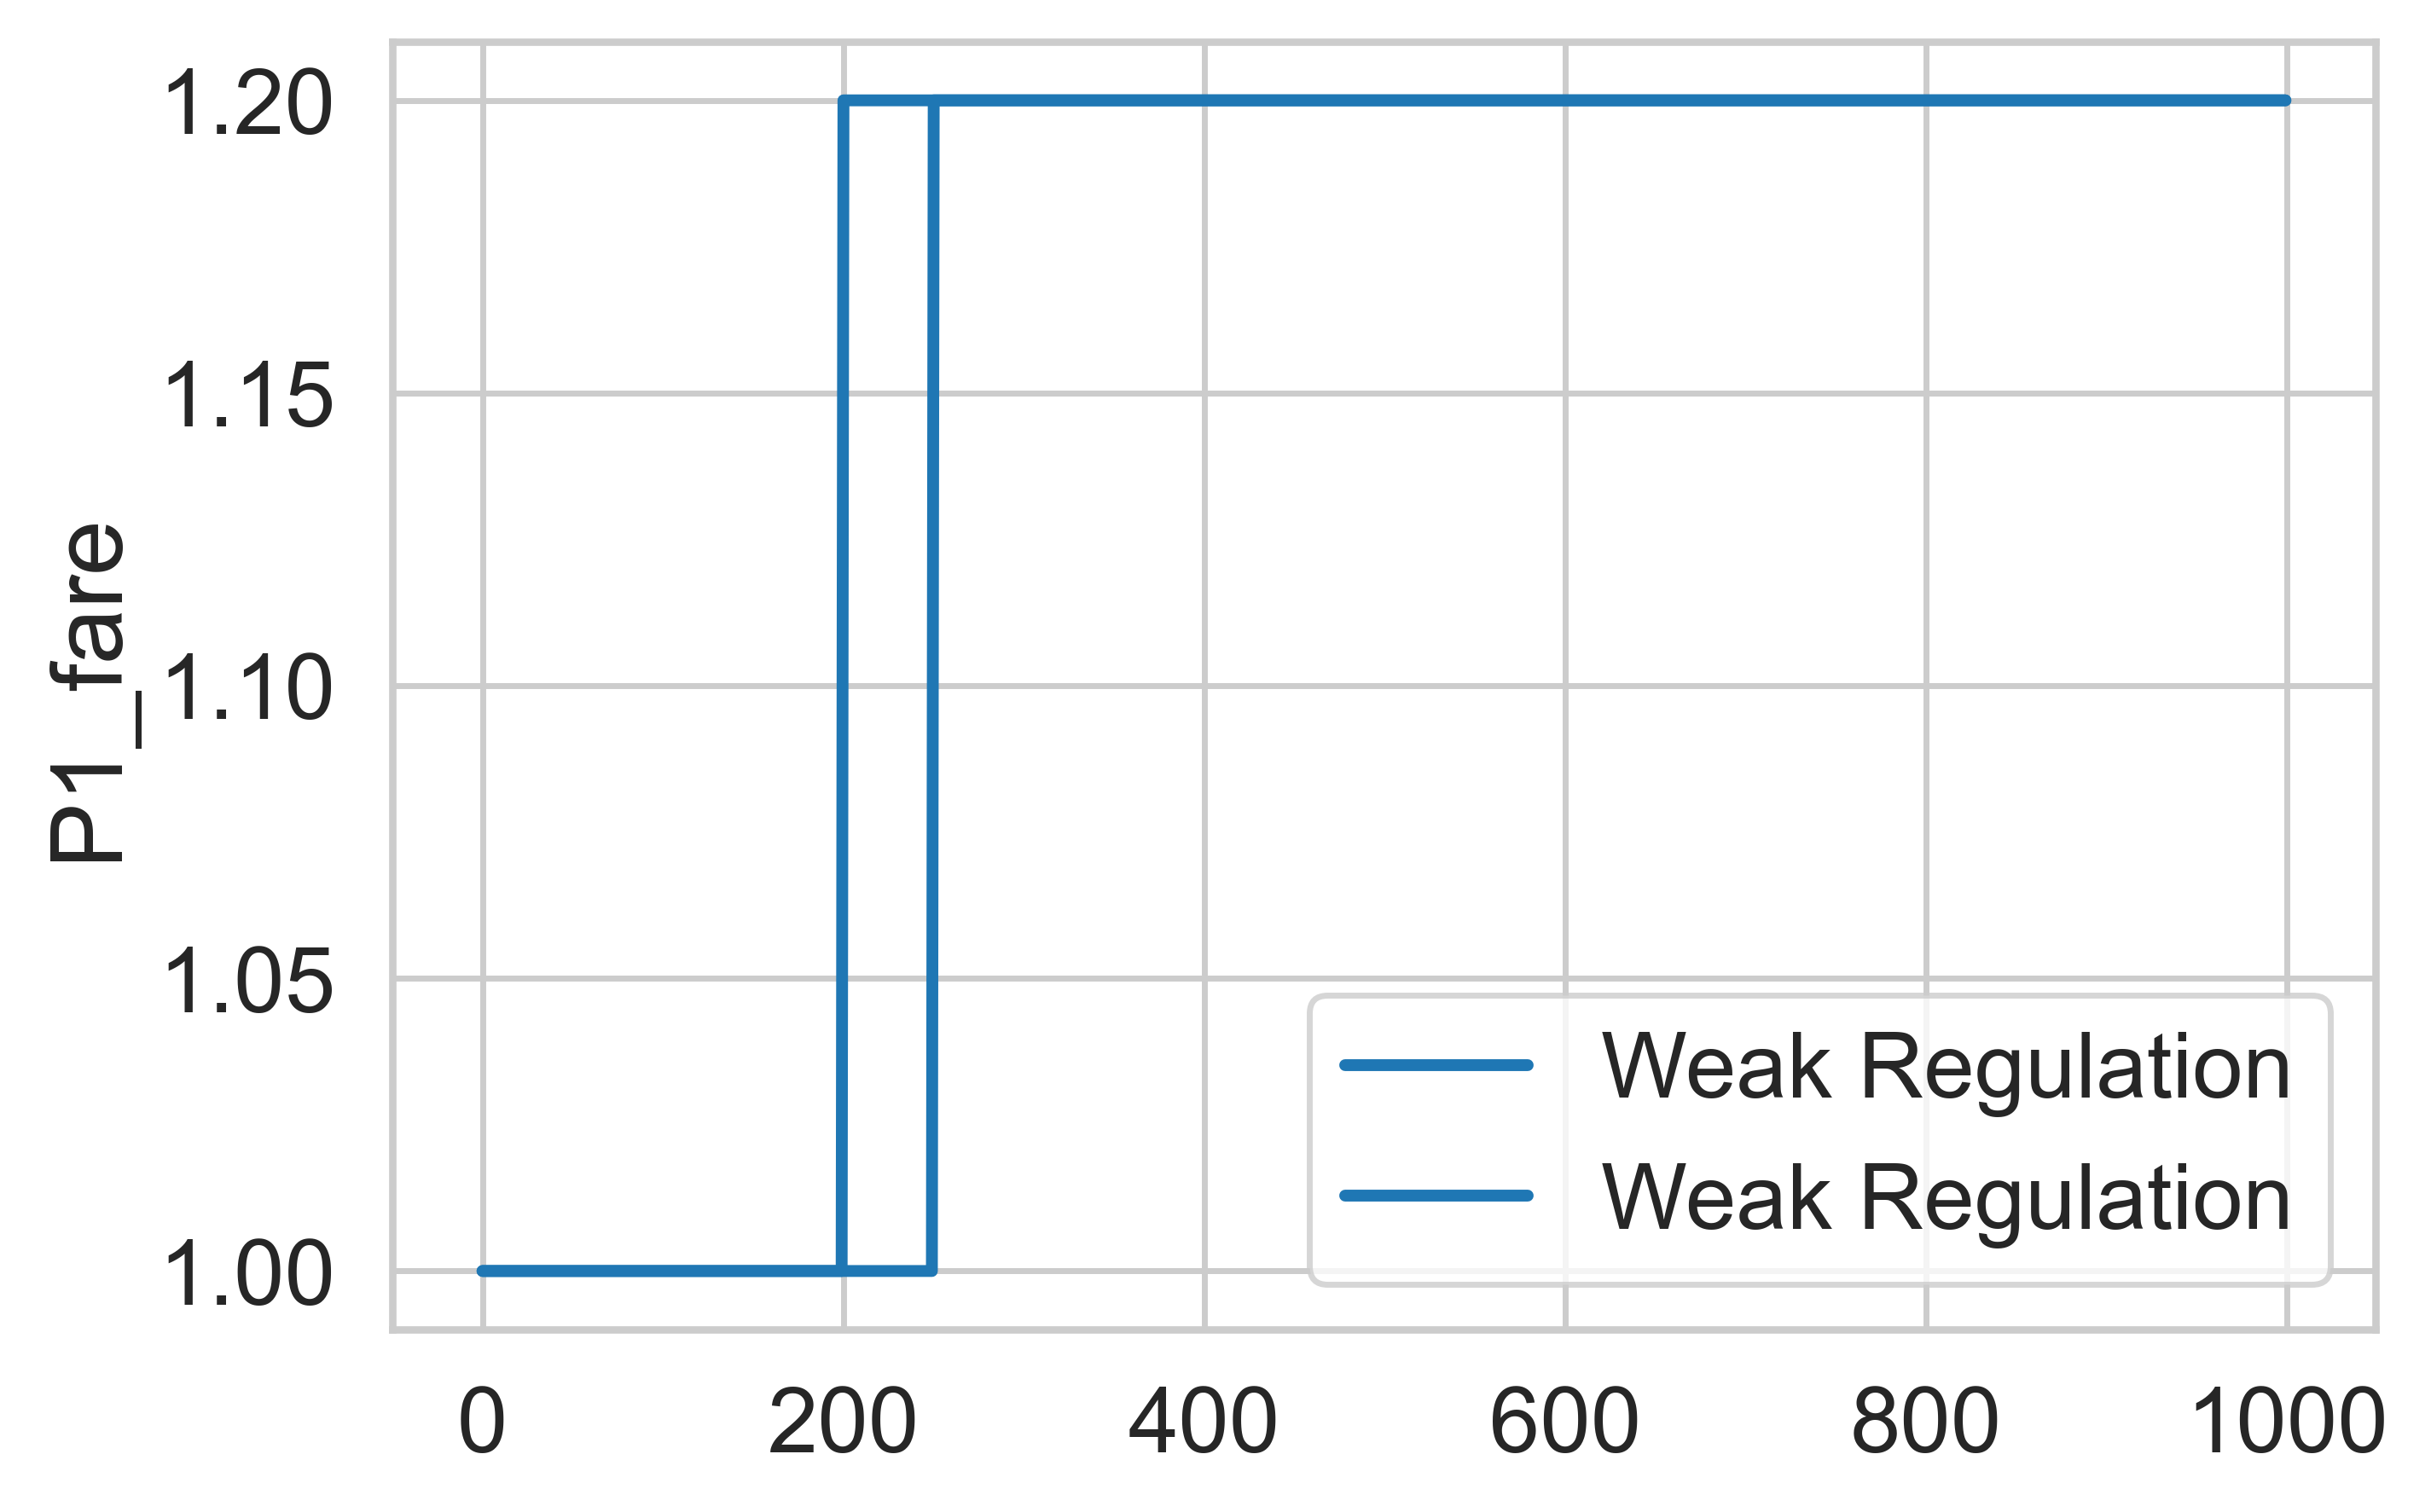

In [6]:

sns.lineplot(x=d_wr.index, y=d_wr.P1_fare, label = 'Weak Regulation', color=c2, lw=lw)
sns.lineplot(x=d_wr.index, y=d_wr.P2_fare, label = 'Weak Regulation', color=c2, lw=lw)



In [ ]:
d_nr.P1_OUT[d] + d_nr.P2_OUT[d]

<AxesSubplot:>

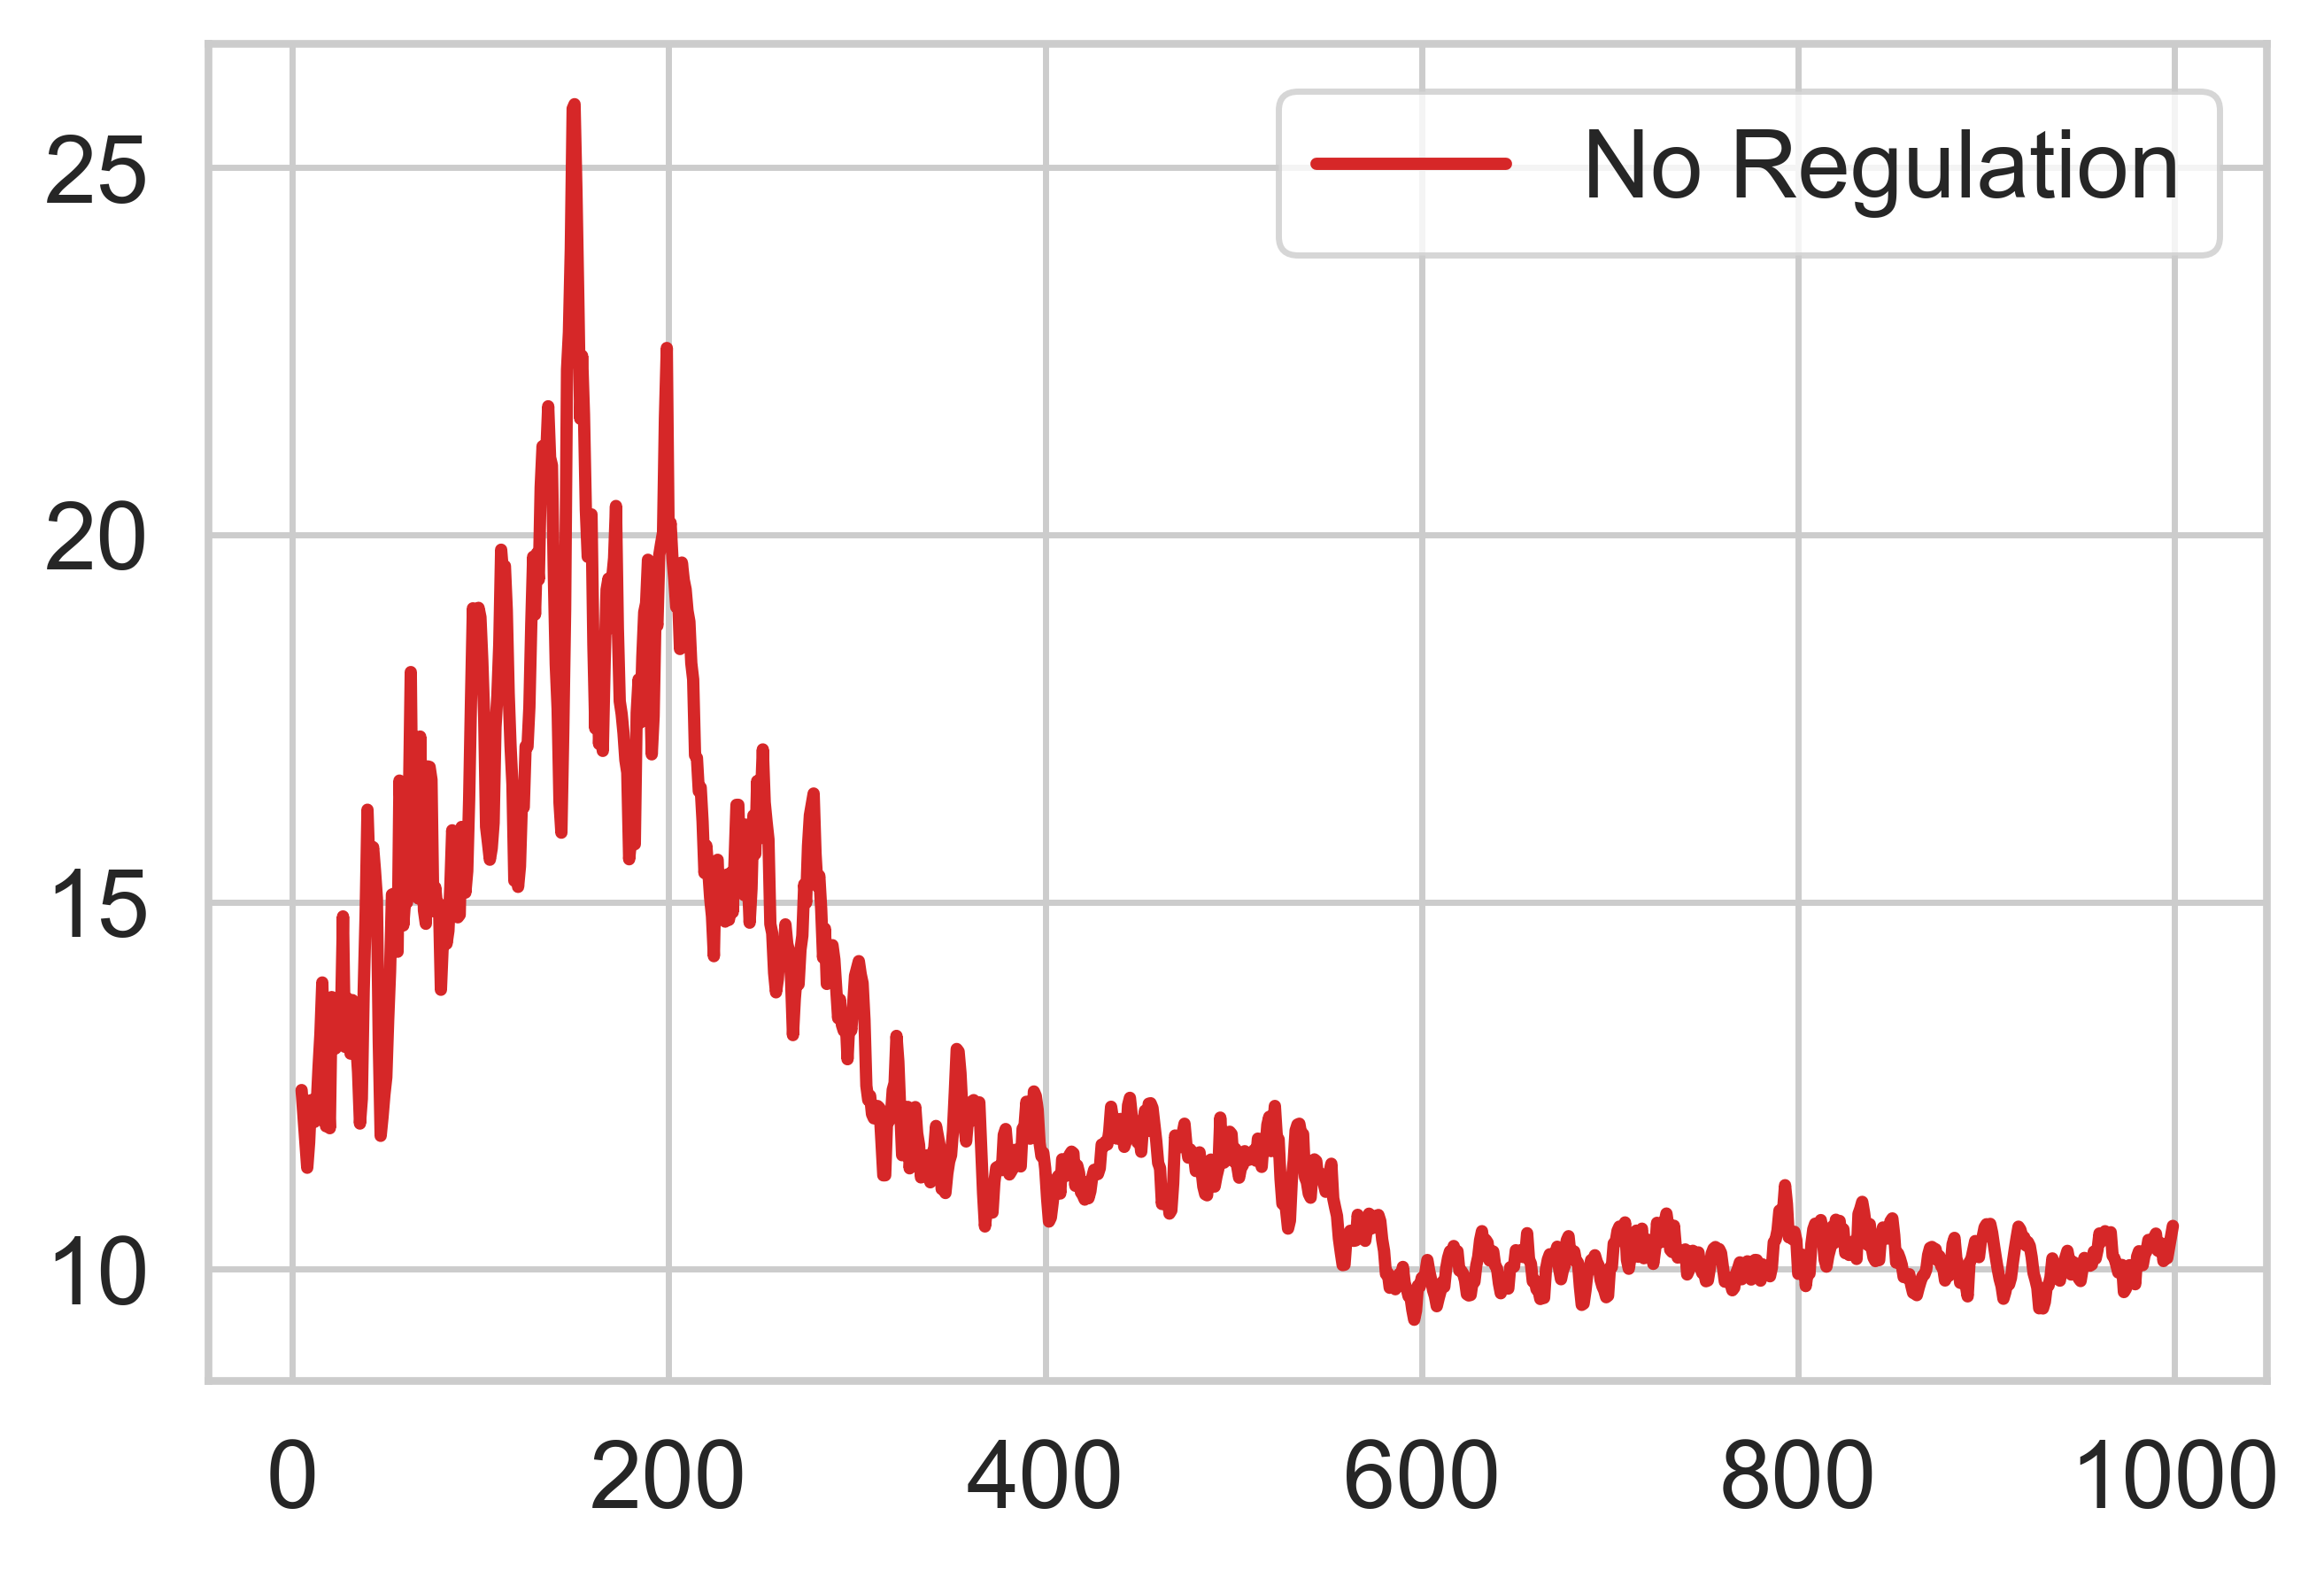

In [179]:
sns.lineplot(x=s_nr.index, y=s_1((d_nr.P1_OUT + d_nr.P2_OUT)/(s_nr.P1_OUT + s_nr.P2_OUT)), label = 'No Regulation', color=c1, lw=lw)

In [ ]:
========================================================================

In [167]:
alpha = '1.0'
demand_df = pd.read_csv('csv/1.1/demand_{}_1_1.csv'.format(alpha))
supply_df = pd.read_csv('csv/1.1/supply_{}_1_1.csv'.format(alpha))

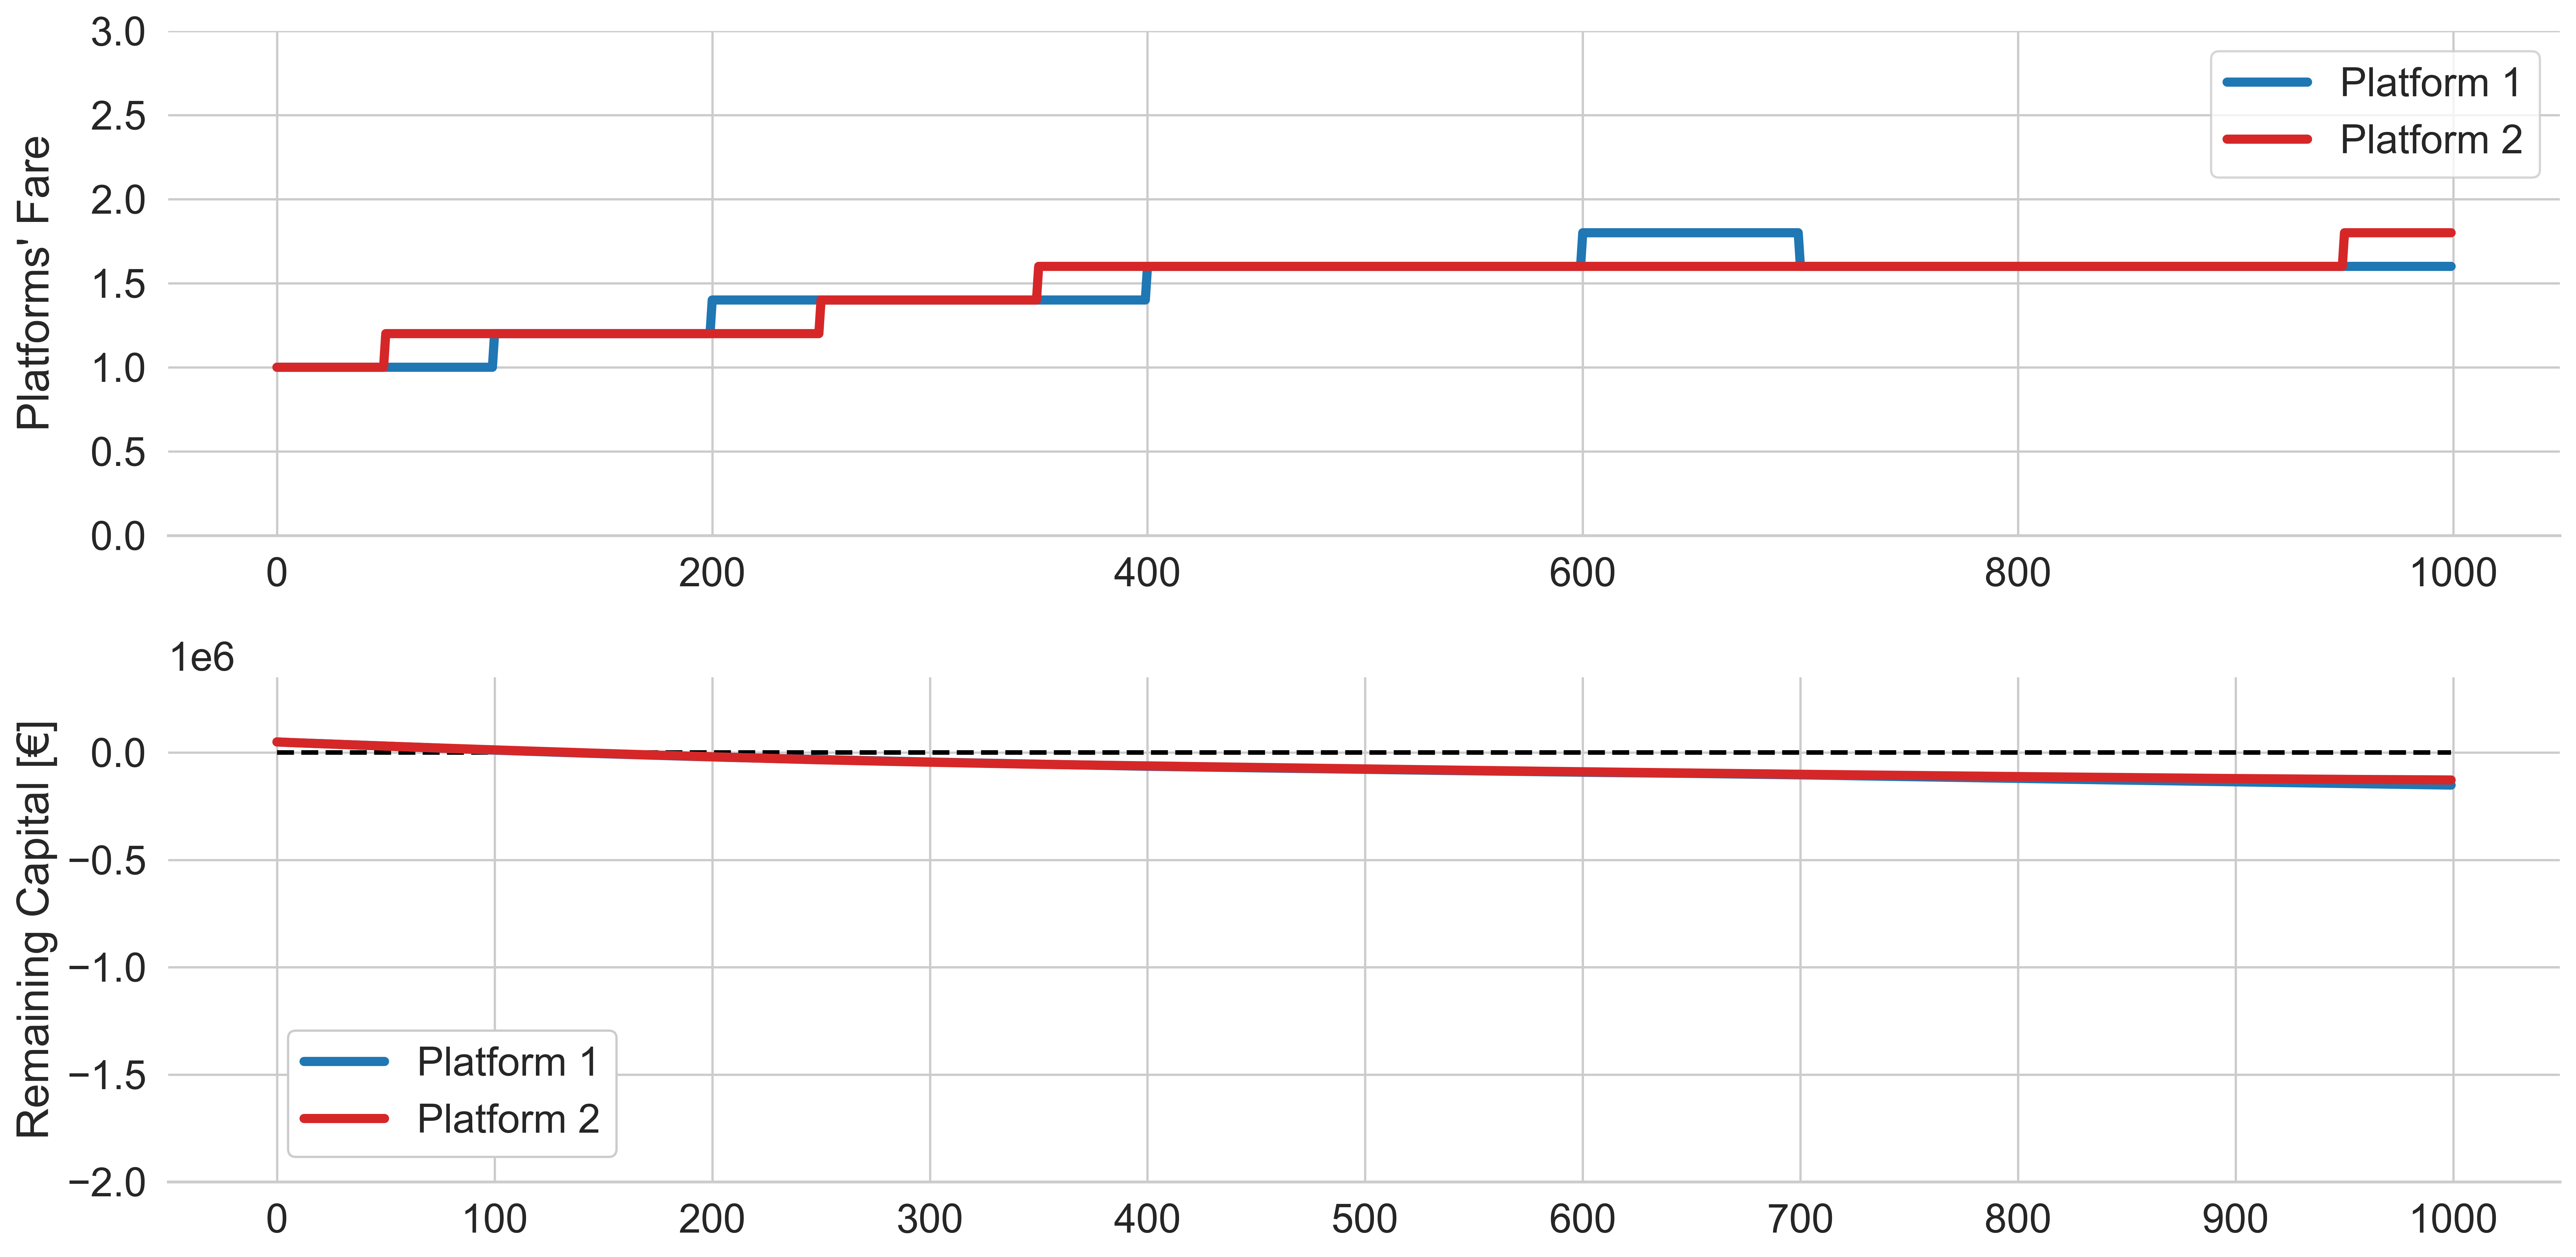

In [168]:
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=demand_df.P1_fare, label = 'Platform 1', color=c1, lw=4, ax=ax[0])
sns.lineplot(x=demand_df.index, y=demand_df.P2_fare, label = 'Platform 2', color=c2, lw=4, ax=ax[0])
ax[0].set(xlabel='', ylabel="Platforms' Fare", ylim = (0, 3))


sns.lineplot(x=demand_df.index, y=demand_df.P1_remaining_capital, label = 'Platform 1', color=c1, lw=4, ax=ax[1])
sns.lineplot(x=demand_df.index, y=demand_df.P2_remaining_capital, label = 'Platform 2', color=c2, lw=4, ax=ax[1])
ax[1].set(xlabel='', ylabel='Remaining Capital [€]', ylim = (-2000000, 350000))
ax[1].legend(frameon=True,framealpha=1, loc=(0.05,0.05))

ax[1].hlines([0], 0, demand_df.index.max(), linestyles='dashed', colors='black', lw=2)

v_grid = np.arange(0, demand_df.index.max() + 2, 100)
ax[1].set_xticks(v_grid)

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/1.1/PF_RC_{}.png'.format(alpha))

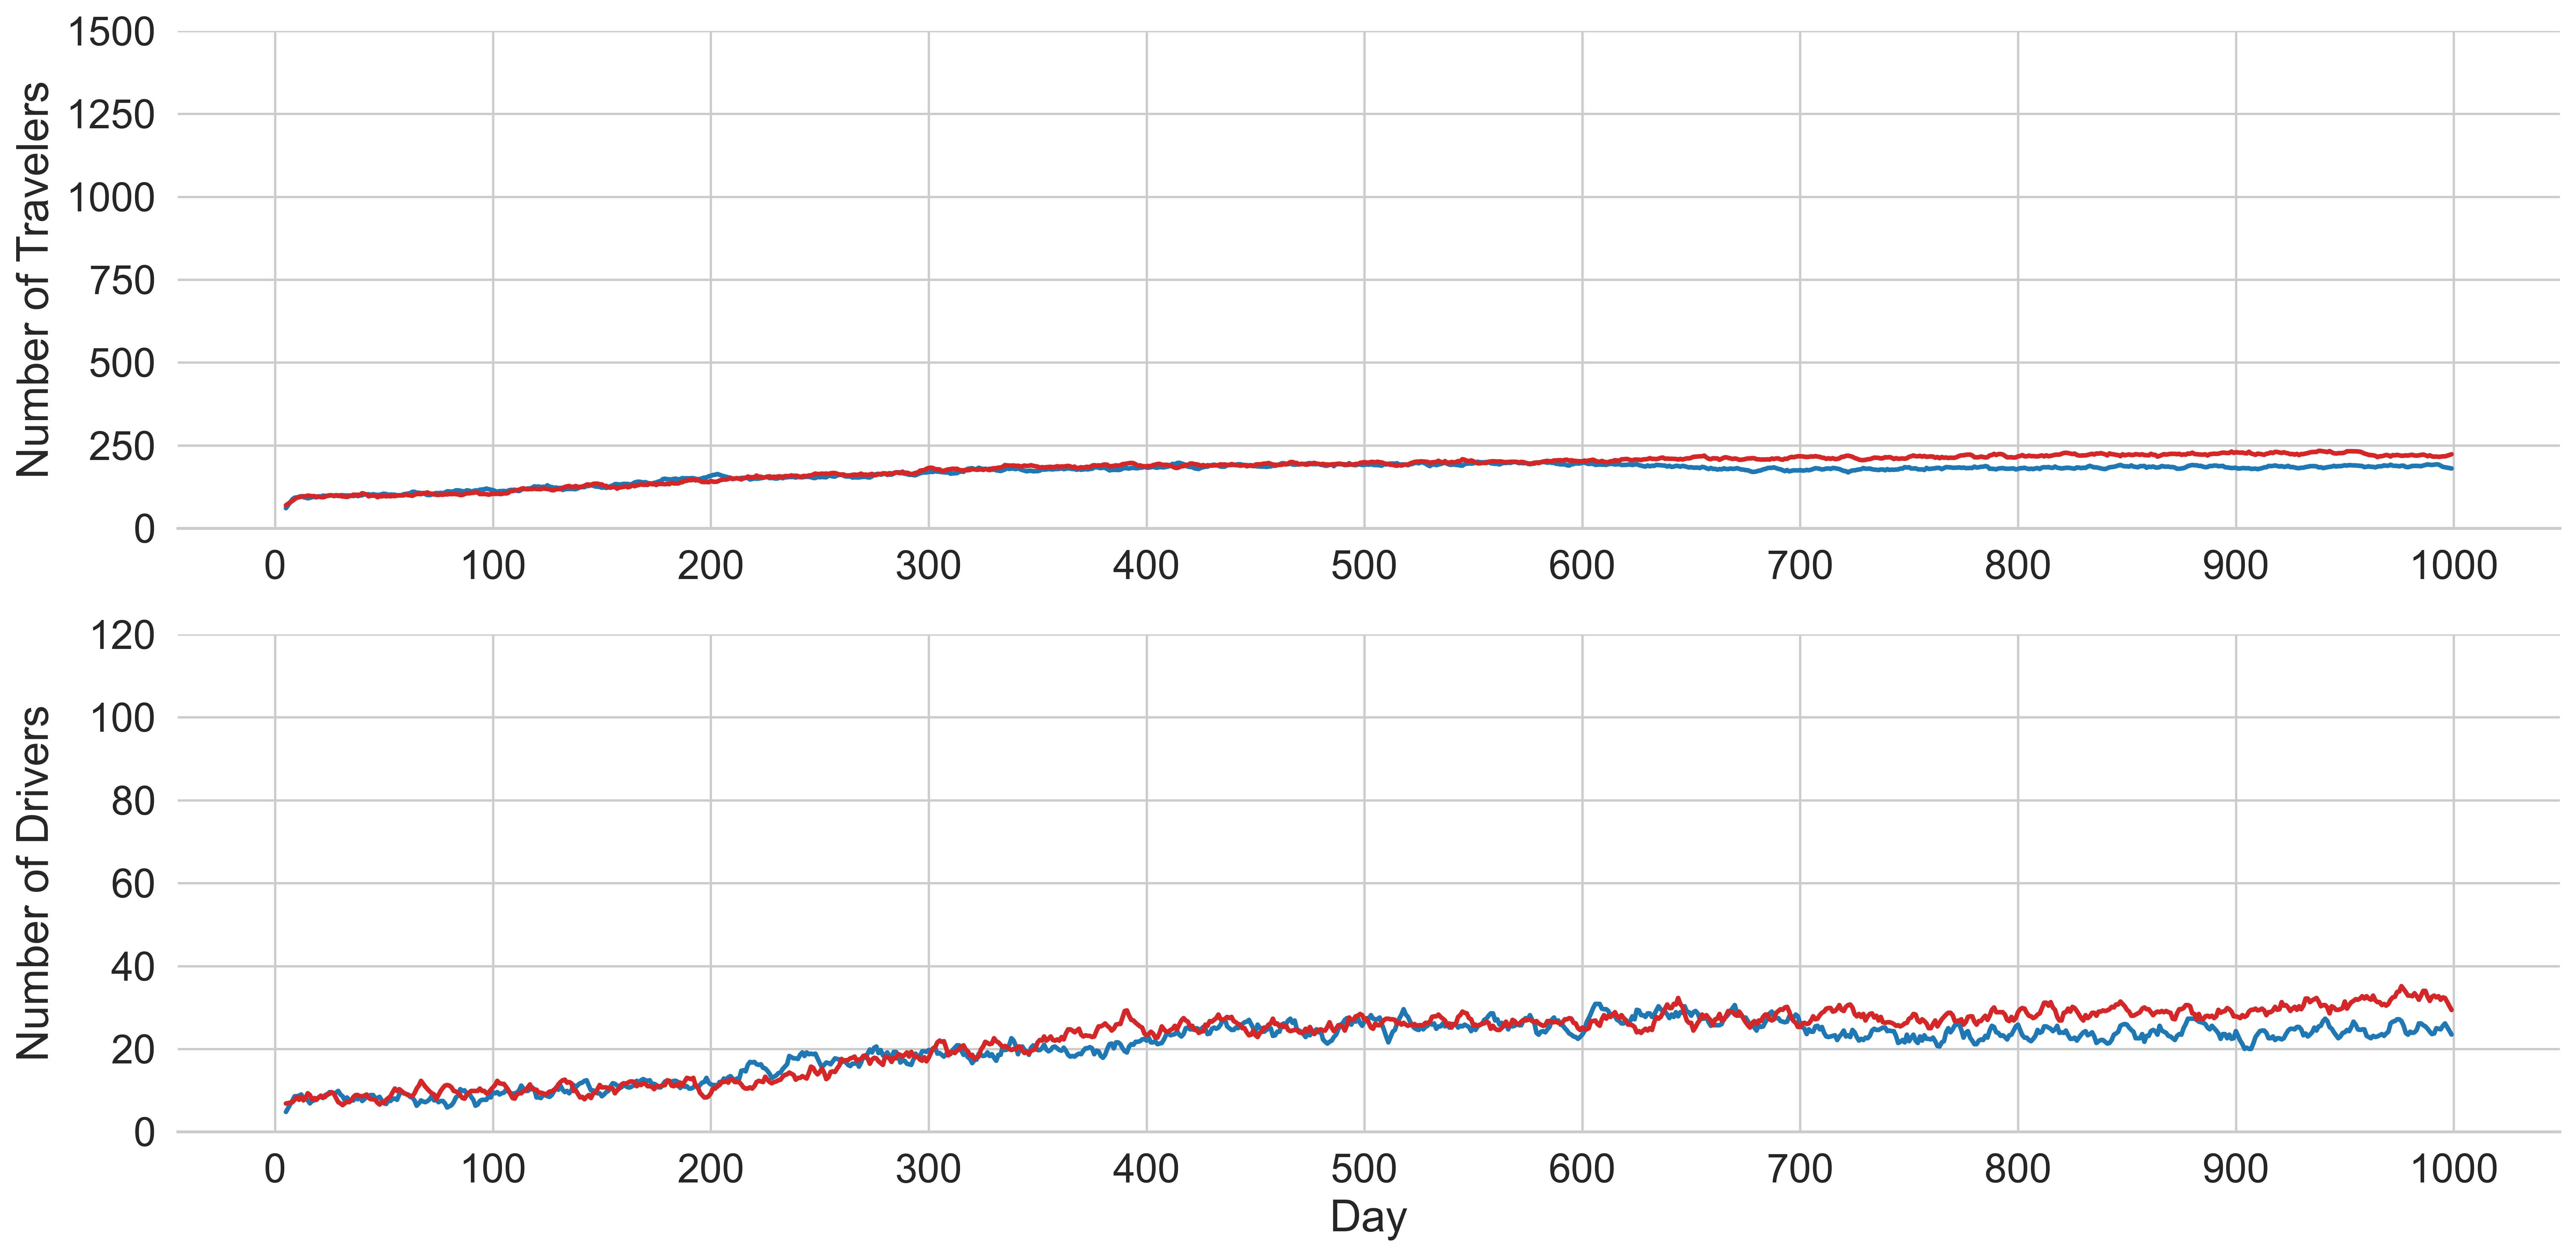

In [169]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_OUT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_OUT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel='Number of Travelers', ylim=(0,1500))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_OUT), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_OUT), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Number of Drivers', ylim=(0,120))

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/1.1/NP_NV_{}.png'.format(alpha))

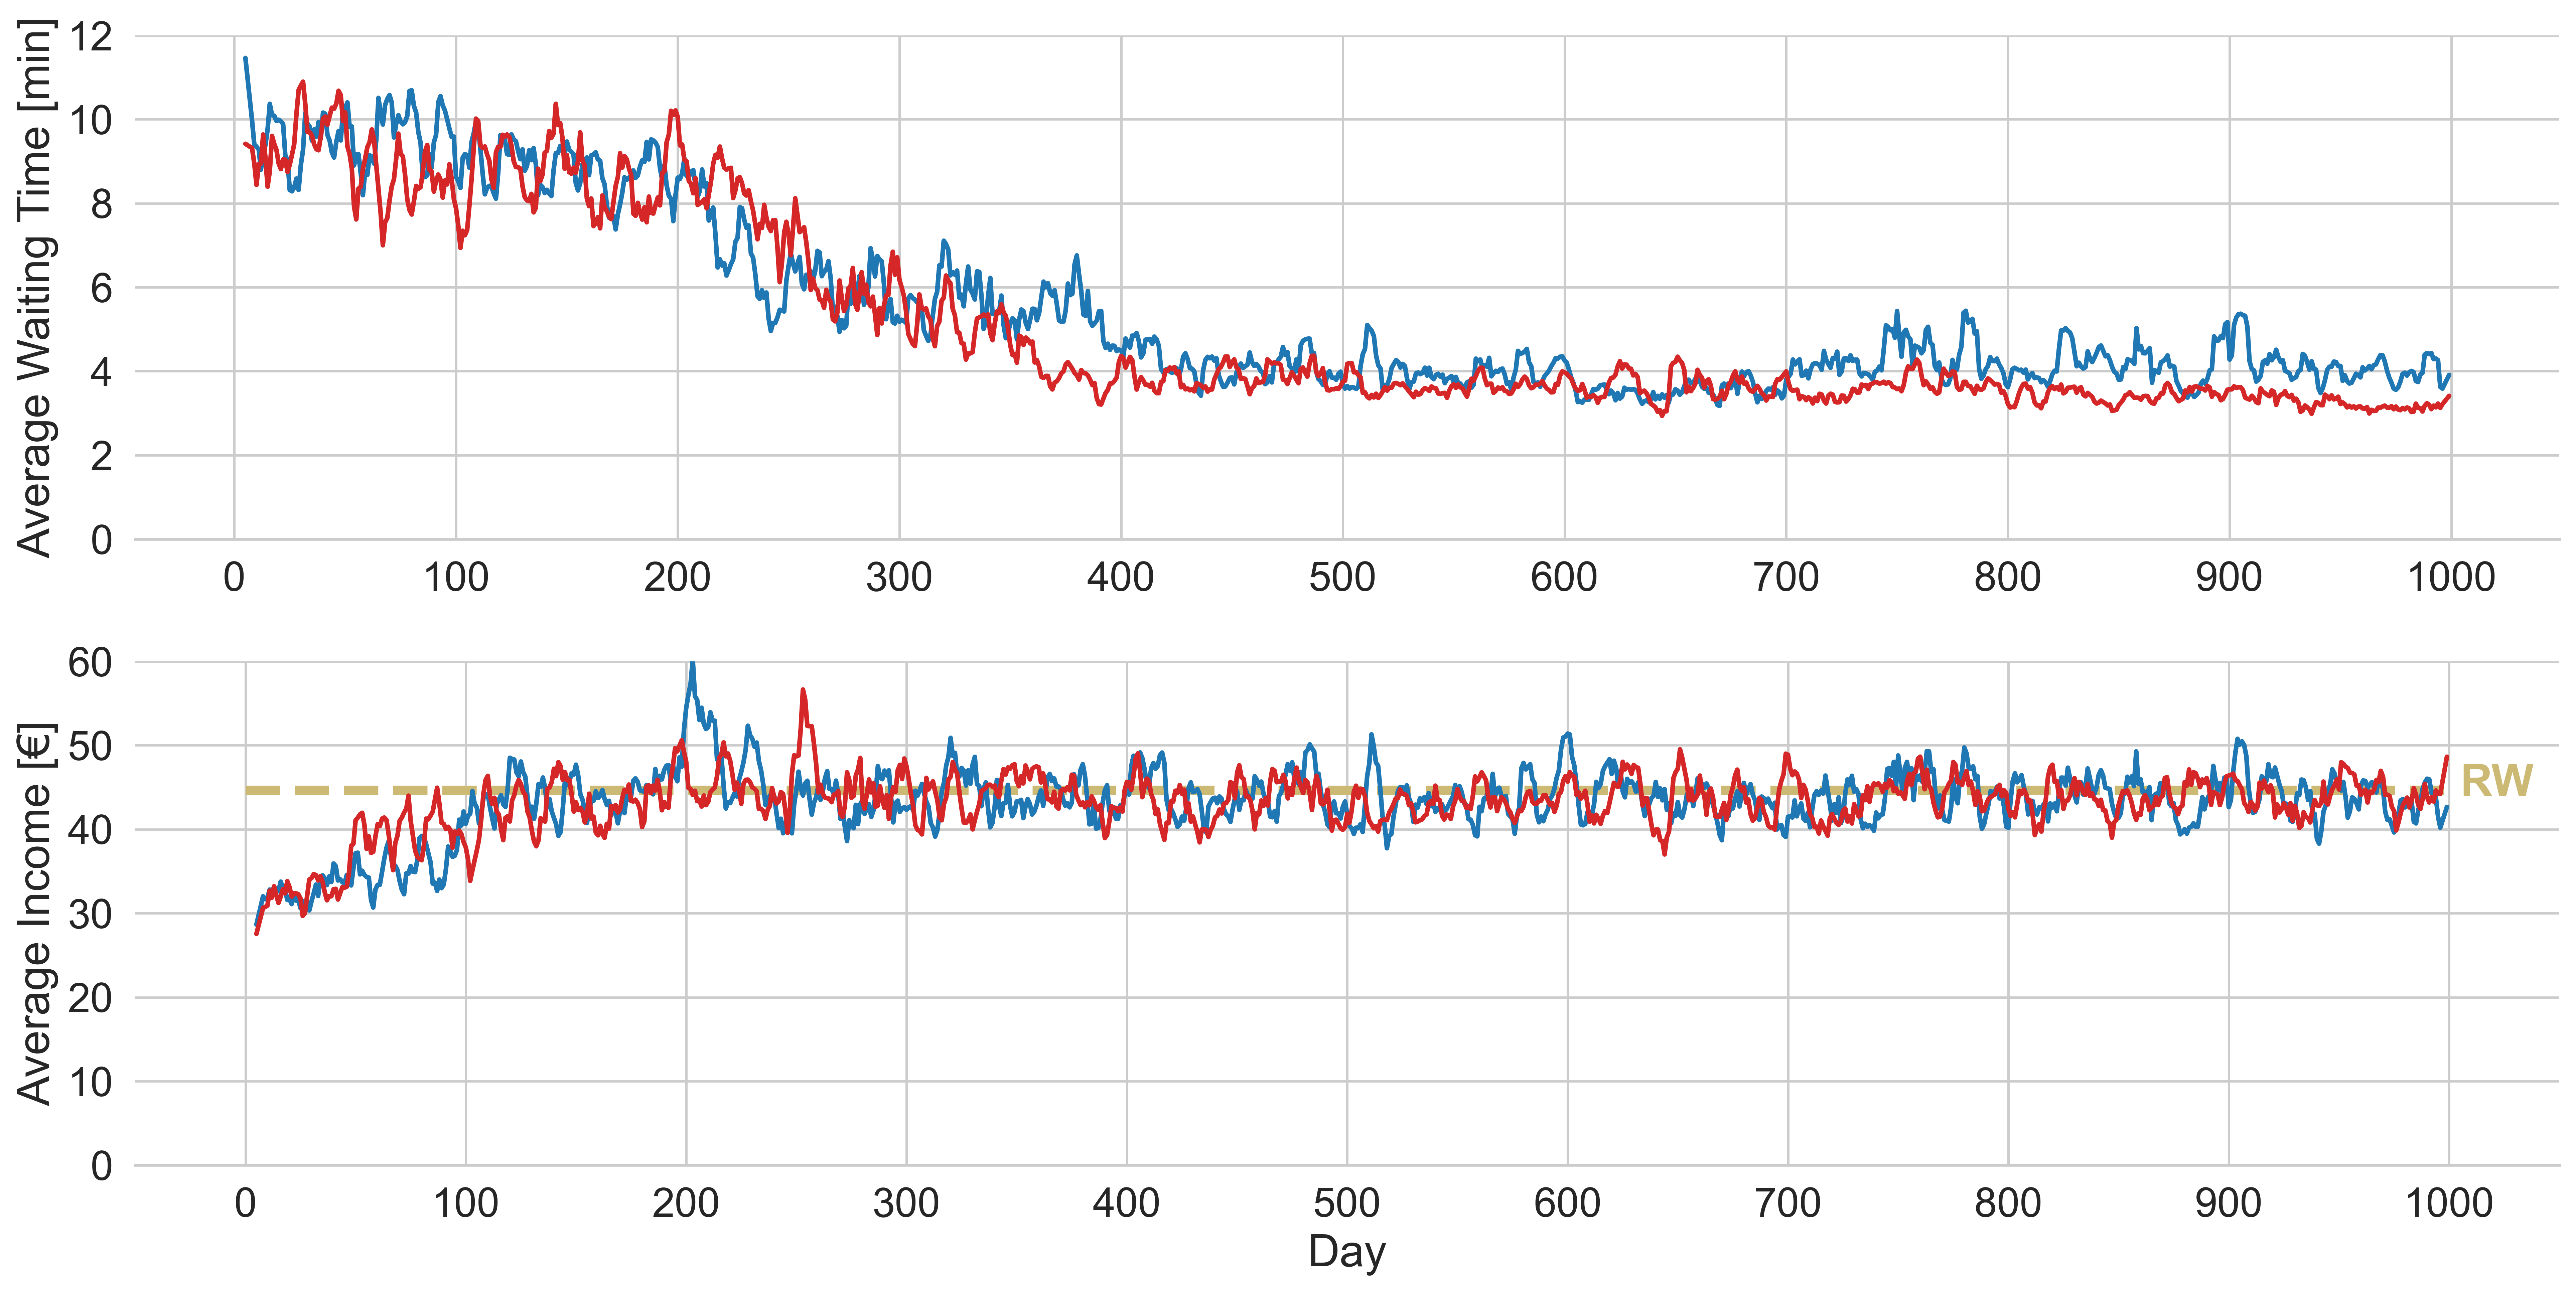

In [170]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'
RW = 4*11.16

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_ACTUAL_WT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_ACTUAL_WT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel="Average Waiting Time [min]", ylim=(0,12))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_ACTUAL_INC), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_ACTUAL_INC), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Average Income [€]', ylim=(0,60))

ax[1].hlines([RW], 0, 1000, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(1005,44), fontweight='bold', color='y')    

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/1.1/AWT_AI_{}.png'.format(alpha))